In [ ]:
# importing liabraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv(r"/content/drive/MyDrive/Mini project_Fare_amount_prediction/customer_shopping_data.csv",parse_dates=["invoice_date"])

In [ ]:
df.head()

invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card   2022-05-08          Kanyon  
1     Debit Card   2021-12-12  Forum Istanbul  
2           Cash   2021-09-11       Metrocity  
3    Credit Card   2021-05-16    Metropol AVM  
4           Cash   2021-10-24          Kanyon

In [ ]:
df.tail()

invoice_no customer_id  gender  age         category  quantity    price  \
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580    Male   27  Food & Beverage         2    10.46   
99454    I824010     C103292    Male   63  Food & Beverage         2    10.46   
99455    I702964     C800631    Male   56       Technology         4  4200.00   
99456    I232867     C273973  Female   36         Souvenir         3    35.19   

      payment_method invoice_date     shopping_mall  
99452    Credit Card   2022-09-21            Kanyon  
99453           Cash   2021-09-22    Forum Istanbul  
99454     Debit Card   2021-03-28         Metrocity  
99455           Cash   2021-03-16      Istinye Park  
99456    Credit Card   2022-10-15  Mall of Istanbul

In [ ]:
df.shape

(99457, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [ ]:
df.describe(include="object").T

count unique               top   freq
invoice_no      99457  99457           I138884      1
customer_id     99457  99457           C241288      1
gender          99457      2            Female  59482
category        99457      8          Clothing  34487
payment_method  99457      3              Cash  44447
shopping_mall   99457     10  Mall of Istanbul  19943

In [ ]:
df.describe().T

count        mean         std    min    25%    50%      75%  \
age       99457.0   43.427089   14.990054  18.00  30.00   43.0    56.00   
quantity  99457.0    3.003429    1.413025   1.00   2.00    3.0     4.00   
price     99457.0  689.256321  941.184567   5.23  45.45  203.3  1200.32   

             max  
age         69.0  
quantity     5.0  
price     5250.0

In [ ]:
df.describe(include="all").T

count unique                  top   freq      first  \
invoice_no        99457  99457              I138884      1        NaT   
customer_id       99457  99457              C241288      1        NaT   
gender            99457      2               Female  59482        NaT   
age             99457.0    NaN                  NaN    NaN        NaT   
category          99457      8             Clothing  34487        NaT   
quantity        99457.0    NaN                  NaN    NaN        NaT   
price           99457.0    NaN                  NaN    NaN        NaT   
payment_method    99457      3                 Cash  44447        NaT   
invoice_date      99457    797  2021-11-24 00:00:00    159 2021-01-01   
shopping_mall     99457     10     Mall of Istanbul  19943        NaT   

                     last        mean         std   min    25%    50%  \
invoice_no            NaT         NaN         NaN   NaN    NaN    NaN   
customer_id           NaT         NaN         NaN   NaN    NaN    NaN   
gender                NaT         NaN         NaN   NaN    NaN    NaN   
age                   NaT   43.427089   14.990054  18.0   30.0   43.0   
category              NaT         NaN         NaN   NaN    NaN    NaN   
quantity              NaT    3.003429    1.413025   1.0    2.0    3.0   
price                 NaT  689.256321  941.184567  5.23  45.45  203.3   
payment_method        NaT         NaN         NaN   NaN    NaN    NaN   
invoice_date   2023-12-02         NaN         NaN   NaN    NaN    NaN   
shopping_mall         NaT         NaN         NaN   NaN    NaN    NaN   

                    75%     max  
invoice_no          NaN     NaN  
customer_id         NaN     NaN  
gender              NaN     NaN  
age                56.0    69.0  
category            NaN     NaN  
quantity            4.0     5.0  
price           1200.32  5250.0  
payment_method      NaN     NaN  
invoice_date        NaN     NaN  
shopping_mall       NaN     NaN

In [ ]:
df.dtypes

invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
dtype: object

In [ ]:

df["invoice_no"]=df["invoice_no"].str.extract('(\d+)', expand=False)

In [ ]:
df["customer_id"]=df["customer_id"].str.extract('(\d+)', expand=False)

In [ ]:
df.dtypes

invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
dtype: object

In [ ]:
df['invoice_no'] = df['invoice_no'].astype(int)

df['customer_id'] = df['customer_id'].astype(int)

In [ ]:
df.dtypes

invoice_no                 int64
customer_id                int64
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
dtype: object

In [ ]:
df.head(1)

invoice_no  customer_id  gender  age  category  quantity   price  \
0      138884       241288  Female   28  Clothing         5  1500.4   

  payment_method invoice_date shopping_mall  
0    Credit Card   2022-05-08        Kanyon

In [ ]:
df.nunique()

invoice_no        99457
customer_id       99457
gender                2
age                  52
category              8
quantity              5
price                40
payment_method        3
invoice_date        797
shopping_mall        10
dtype: int64

In [ ]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df["price"].unique()

array([1.50040e+03, 1.80051e+03, 3.00080e+02, 3.00085e+03, 6.06000e+01,
       4.06600e+01, 6.00160e+02, 9.00240e+02, 1.04600e+01, 1.51500e+01,
       1.43360e+02, 3.03000e+01, 1.56900e+01, 5.23000e+00, 5.25000e+03,
       7.57500e+01, 7.16800e+01, 2.03300e+02, 2.40068e+03, 1.21980e+02,
       1.07520e+02, 1.20032e+03, 8.13200e+01, 4.54500e+01, 4.20000e+03,
       1.62640e+02, 5.86500e+01, 2.61500e+01, 3.51900e+01, 2.09200e+01,
       2.34600e+01, 2.10000e+03, 3.58400e+01, 3.15000e+03, 1.79200e+02,
       6.00170e+02, 1.05000e+03, 1.20034e+03, 4.69200e+01, 1.17300e+01])

In [ ]:
len(df[df.duplicated()])     # incase if existed duplicates  we can drop that  df.drop_duplicates()

0

In [ ]:
df.isnull()

invoice_no  customer_id  gender    age  category  quantity  price  \
0           False        False   False  False     False     False  False   
1           False        False   False  False     False     False  False   
2           False        False   False  False     False     False  False   
3           False        False   False  False     False     False  False   
4           False        False   False  False     False     False  False   
...           ...          ...     ...    ...       ...       ...    ...   
99452       False        False   False  False     False     False  False   
99453       False        False   False  False     False     False  False   
99454       False        False   False  False     False     False  False   
99455       False        False   False  False     False     False  False   
99456       False        False   False  False     False     False  False   

       payment_method  invoice_date  shopping_mall  
0               False         False          False  
1               False         False          False  
2               False         False          False  
3               False         False          False  
4               False         False          False  
...               ...           ...            ...  
99452           False         False          False  
99453           False         False          False  
99454           False         False          False  
99455           False         False          False  
99456           False         False          False  

[99457 rows x 10 columns]

In [ ]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

# EDA

# Univariate analysis


# 1. Categorical data

In [ ]:
df["gender"].value_counts()

Female    59482
Male      39975
Name: gender, dtype: int64

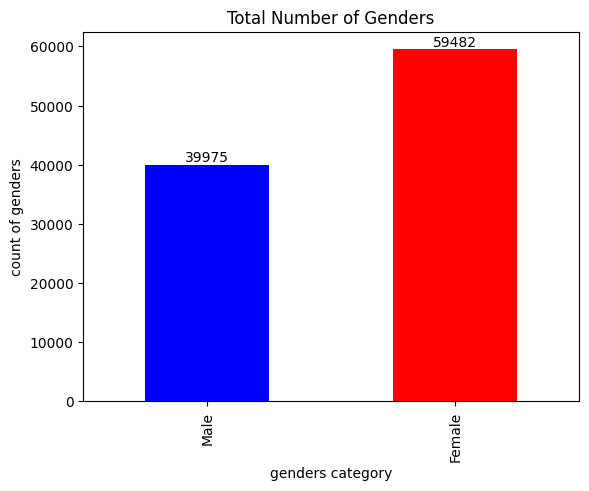

In [ ]:
grouped_df=df['gender'].value_counts().sort_values()

ax = grouped_df.plot(kind='bar', stacked=True,color={"red","blue"})

# Add the top value to each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

# Customize the chart
ax.set_xlabel('genders category')

ax.set_ylabel("count of genders")

ax.set_title('Total Number of Genders')


plt.show()


In [ ]:
df["category"].value_counts()

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64

In [ ]:
df["category"].value_counts().reset_index().sort_values("category",ascending=False).rename(columns={"index":"category","category":"total_value_counts"})

category  total_value_counts
0         Clothing               34487
1        Cosmetics               15097
2  Food & Beverage               14776
3             Toys               10087
4            Shoes               10034
5         Souvenir                4999
6       Technology                4996
7            Books                4981

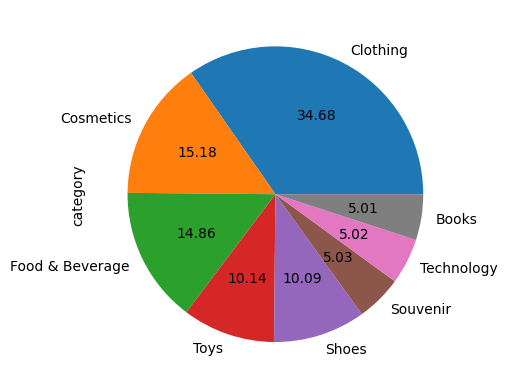

In [ ]:
df["category"].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()


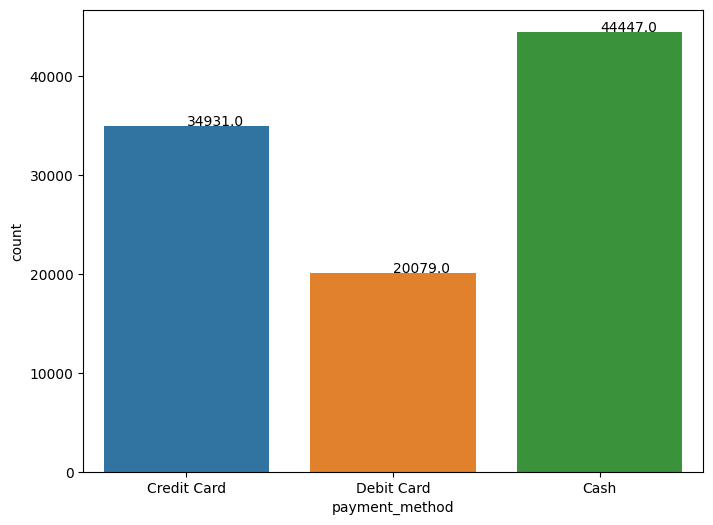

In [ ]:
plt.figure(figsize=(8,6))
# Create a countplot with Seaborn
ax = sns.countplot(x='payment_method', data=df)

# Add labels to the bars with their respective counts
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()))

# Show the countplot
plt.show()


In [ ]:
df["shopping_mall"].value_counts().reset_index().sort_values("shopping_mall",ascending=False).rename(columns={"index":"shopping_mall","shopping_mall":"total_value_counts"})

shopping_mall  total_value_counts
0   Mall of Istanbul               19943
1             Kanyon               19823
2          Metrocity               15011
3       Metropol AVM               10161
4       Istinye Park                9781
5       Zorlu Center                5075
6        Cevahir AVM                4991
7     Forum Istanbul                4947
8     Viaport Outlet                4914
9  Emaar Square Mall                4811

# 2.Numerical Data

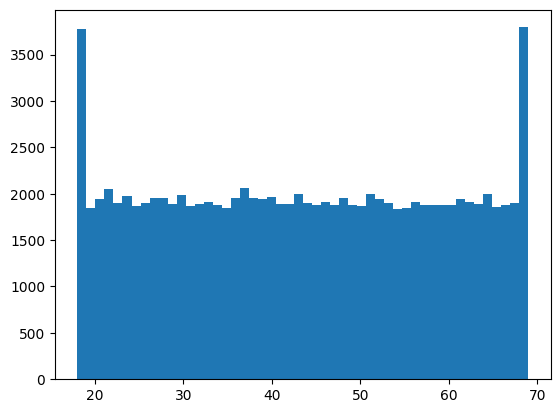

In [ ]:
plt.hist(df['age'],bins=50)  #histogram
plt.show()

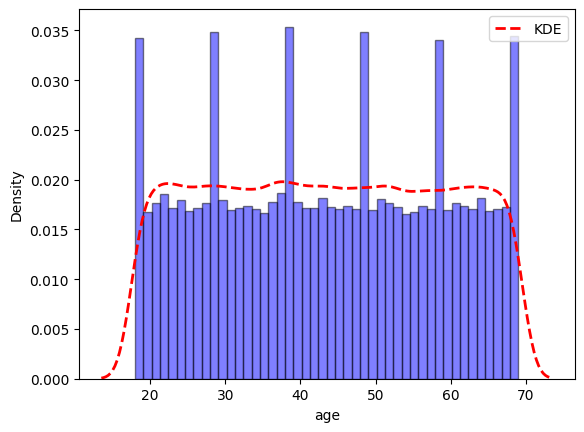

In [ ]:
sns.distplot(df['age'],kde_kws={"color":"r","lw":2 ,"label":"KDE", 'ls':'--'},hist_kws={"alpha":0.5,"color":"b",'edgecolor':'black'});
plt.legend(loc=0)
plt.show()#distplot

<Axes: >

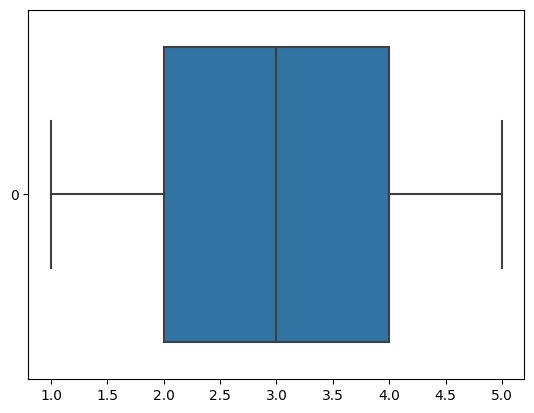

In [ ]:
sns.boxplot(df['quantity'],orient='h')


In [ ]:
px.box(df,x='price',orientation='h')


# BI-variate and Multi-variate analysis

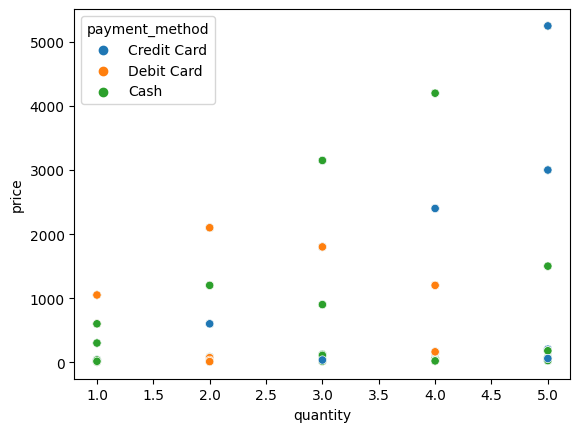

In [ ]:

sns.scatterplot(x='quantity',y='price', data=df , hue="payment_method")

plt.show()

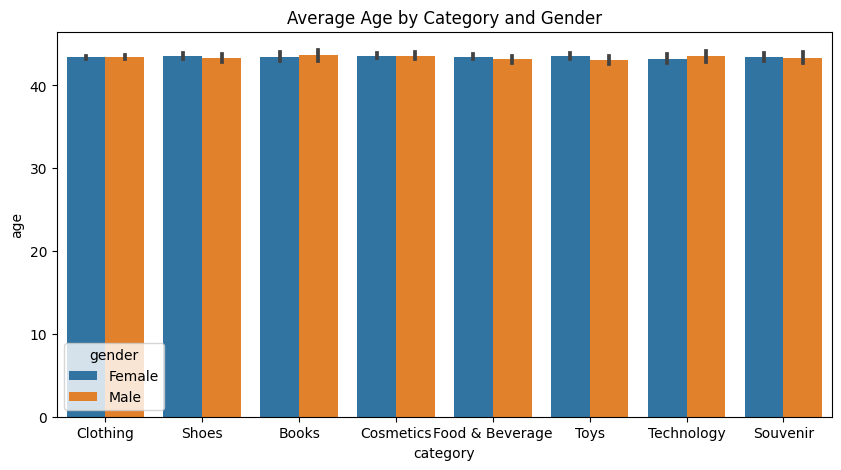

In [ ]:
plt.figure(figsize=(10,5))

sns.barplot(x='category',y="age",hue='gender',data=df,saturation=0.75);
plt.title("Average Age by Category and Gender")
plt.show()

sns.scatterplot()

In [ ]:
df.head(1)

invoice_no  customer_id  gender  age  category  quantity   price  \
0      138884       241288  Female   28  Clothing         5  1500.4   

  payment_method invoice_date shopping_mall  
0    Credit Card   2022-05-08        Kanyon

In [ ]:
px.box(df , x='age' , color='gender',orientation="h")

In [ ]:
#sns.boxplot(x='gender',y='age',data=df)

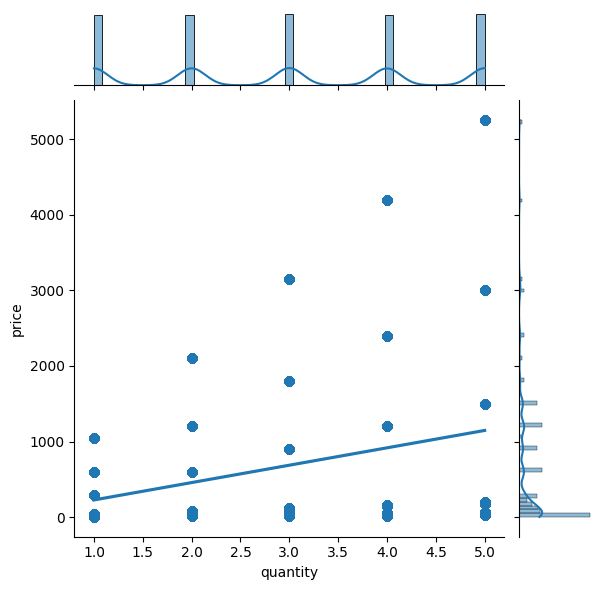

In [ ]:
sns.jointplot(x='quantity',y='price',data=df,kind="reg");

In [ ]:
df["sales"]=df["price"]*df["quantity"]

In [ ]:
df["invoice_date"]

0       2022-05-08
1       2021-12-12
2       2021-09-11
3       2021-05-16
4       2021-10-24
           ...    
99452   2022-09-21
99453   2021-09-22
99454   2021-03-28
99455   2021-03-16
99456   2022-10-15
Name: invoice_date, Length: 99457, dtype: datetime64[ns]

In [ ]:
df['year']= df['invoice_date'].dt.year

df['month']= df['invoice_date'].dt.month

df['day']= df['invoice_date'].dt.day
df['weekday']= df['invoice_date'].dt.weekday

dw_mapping={
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

df['dayofweek']= df['invoice_date'].dt.weekday.map(dw_mapping)

In [ ]:
df.head(1)

invoice_no  customer_id  gender  age  category  quantity   price  \
0      138884       241288  Female   28  Clothing         5  1500.4   

  payment_method invoice_date shopping_mall   sales  year  month  day  \
0    Credit Card   2022-05-08        Kanyon  7502.0  2022      5    8   

   weekday dayofweek  
0        6    Sunday

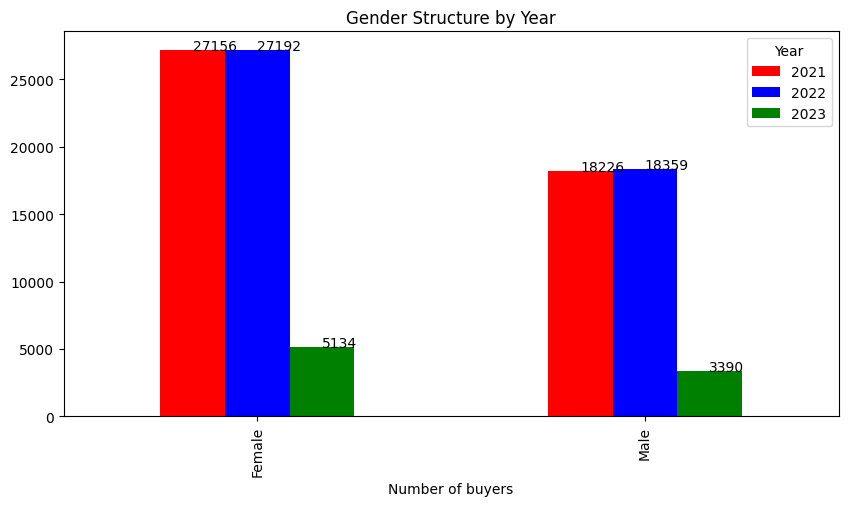

In [ ]:

df_gender_year = df.groupby(['gender', 'year'])['customer_id'].nunique().unstack()

# Plot the gender structure with years
ax = df_gender_year.plot(kind='bar', figsize=(10,5), color=['red', 'blue', 'green'])
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()))
ax.set_xlabel("Number of buyers")
ax.set_title("Gender Structure by Year")
ax.legend(title='Year', labels=['2021', '2022', '2023'])

plt.show()

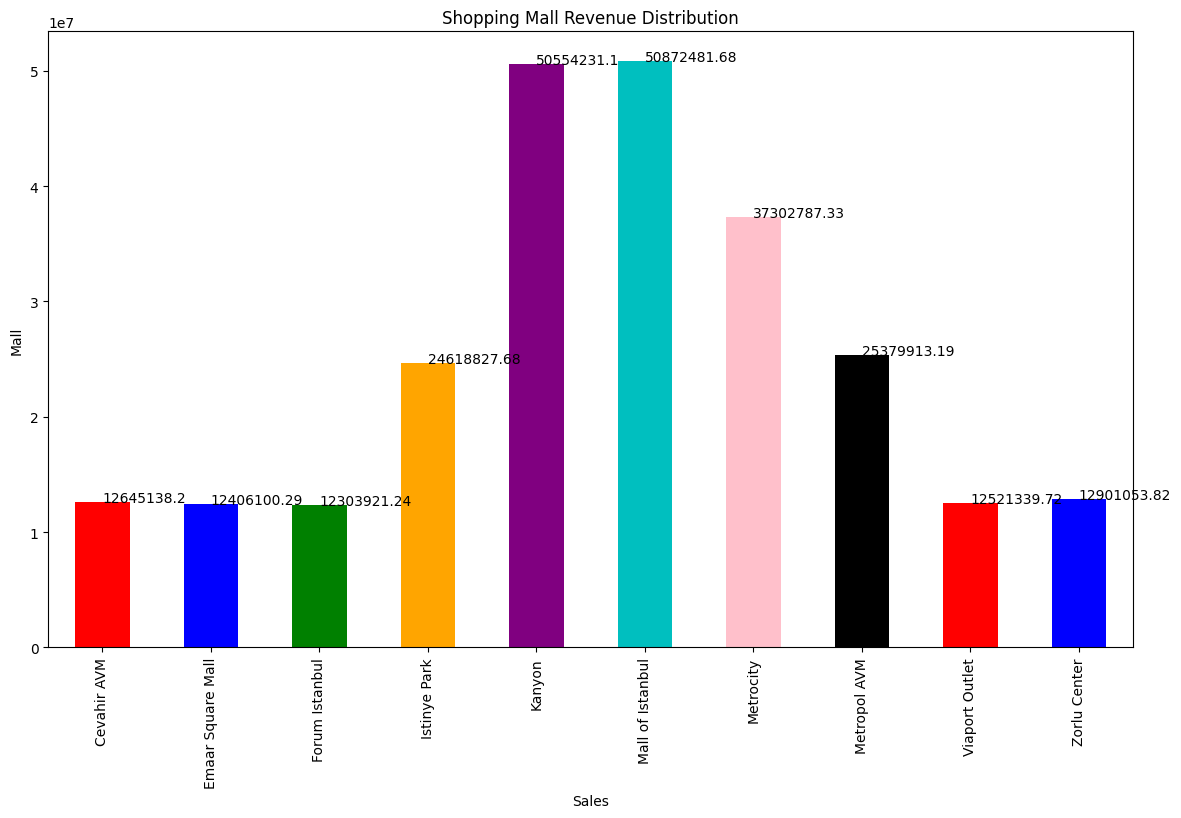

In [ ]:
# Let's see which the most sales shopping mall
colors = ['red', 'blue', 'green', 'orange', 'purple','c' ,'pink', 'k']
df_mall = df.groupby("shopping_mall")["sales"].sum()
ax=df_mall.plot(kind="bar",figsize=(14, 8),color=colors)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()))

plt.title('Shopping Mall Revenue Distribution')
plt.xlabel('Sales')
plt.ylabel('Mall')
plt.show()

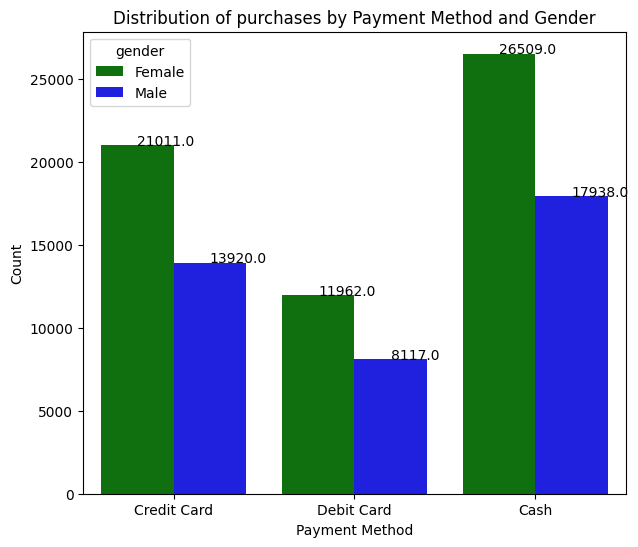

In [ ]:
fig, i = plt.subplots(figsize=(7, 6))

custom_palette = {'Male': 'b',"Female":"g"}

ax=sns.countplot(data=df, x='payment_method', hue='gender', ax=i  , palette=custom_palette)

# Add labels to the bars with their respective counts

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()))

ax.set_title('Distribution of purchases by Payment Method and Gender')
ax.set_xlabel('Payment Method')
ax.set_ylabel('Count')

plt.show()

In [ ]:
df.groupby('category')['gender'].value_counts()

category         gender
Books            Female     2906
                 Male       2075
Clothing         Female    20652
                 Male      13835
Cosmetics        Female     9070
                 Male       6027
Food & Beverage  Female     8804
                 Male       5972
Shoes            Female     5967
                 Male       4067
Souvenir         Female     3017
                 Male       1982
Technology       Female     2981
                 Male       2015
Toys             Female     6085
                 Male       4002
Name: gender, dtype: int64

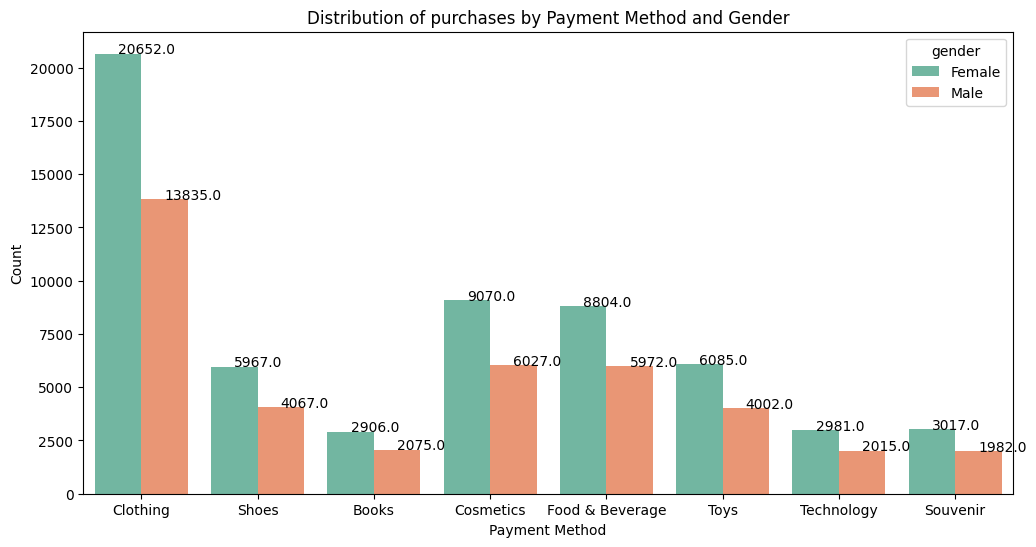

In [ ]:
fig, i = plt.subplots(figsize=(12, 6))

ax=sns.countplot(data=df, x='category', hue='gender', ax=i, palette='Set2')
# Add labels to the bars with their respective counts
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()))

ax.set_title('Distribution of purchases by Payment Method and Gender')
ax.set_xlabel('Payment Method')
ax.set_ylabel('Count')

plt.show()

In [ ]:
df.groupby('shopping_mall')['gender'].value_counts()

shopping_mall      gender
Cevahir AVM        Female     2940
                   Male       2051
Emaar Square Mall  Female     2842
                   Male       1969
Forum Istanbul     Female     3016
                   Male       1931
Istinye Park       Female     5874
                   Male       3907
Kanyon             Female    11906
                   Male       7917
Mall of Istanbul   Female    11902
                   Male       8041
Metrocity          Female     8941
                   Male       6070
Metropol AVM       Female     6144
                   Male       4017
Viaport Outlet     Female     2949
                   Male       1965
Zorlu Center       Female     2968
                   Male       2107
Name: gender, dtype: int64

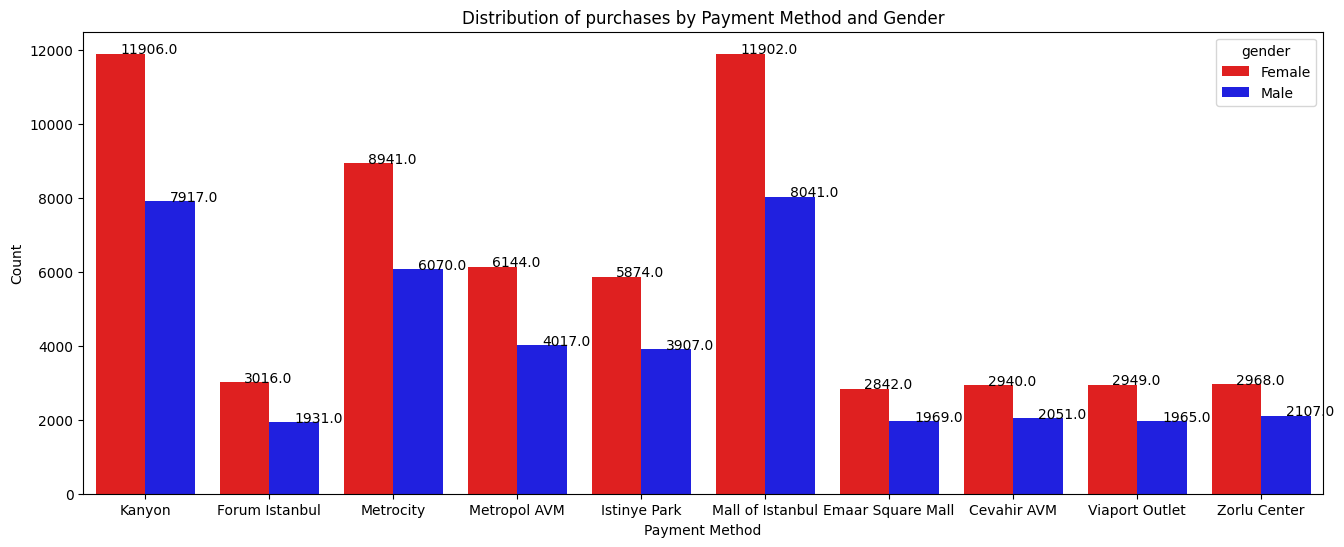

In [ ]:
fig, i = plt.subplots(figsize=(16, 6))
custom_palette = {'Male': 'b', 'Female': 'r'}

ax=sns.countplot(data=df, x='shopping_mall', hue='gender', ax=i , palette=custom_palette)
# Add labels to the bars with their respective counts
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()))

ax.set_title('Distribution of purchases by Payment Method and Gender')
ax.set_xlabel('Payment Method')
ax.set_ylabel('Count')

plt.show()

## Machine learning projec also  done

# Feature engneering

ONE HOT ENCODING

In [ ]:
df.head(1)

invoice_no  customer_id  gender  age  category  quantity   price  \
0      138884       241288  Female   28  Clothing         5  1500.4   

  payment_method invoice_date shopping_mall   sales  year  month  day  \
0    Credit Card   2022-05-08        Kanyon  7502.0  2022      5    8   

   weekday dayofweek  
0        6    Sunday

In [ ]:
df = pd.get_dummies(df,columns=['gender','category',"payment_method","shopping_mall","dayofweek"])

In [ ]:
df.head(1)

invoice_no  customer_id  age  quantity   price invoice_date   sales  year  \
0      138884       241288   28         5  1500.4   2022-05-08  7502.0  2022   

   month  day  ...  shopping_mall_Metropol AVM  shopping_mall_Viaport Outlet  \
0      5    8  ...                           0                             0   

   shopping_mall_Zorlu Center  dayofweek_Friday  dayofweek_Monday  \
0                           0                 0                 0   

   dayofweek_Saturday  dayofweek_Sunday  dayofweek_Thursday  \
0                   0                 1                   0   

   dayofweek_Tuesday  dayofweek_Wednesday  
0                  0                    0  

[1 rows x 41 columns]

dropping unimportant columns

In [ ]:
df.drop(["invoice_no","customer_id","invoice_date" ],axis=1,inplace=True)

In [ ]:
df.head(1)

age  quantity   price   sales  year  month  day  weekday  gender_Female  \
0   28         5  1500.4  7502.0  2022      5    8        6              1   

   gender_Male  ...  shopping_mall_Metropol AVM  shopping_mall_Viaport Outlet  \
0            0  ...                           0                             0   

   shopping_mall_Zorlu Center  dayofweek_Friday  dayofweek_Monday  \
0                           0                 0                 0   

   dayofweek_Saturday  dayofweek_Sunday  dayofweek_Thursday  \
0                   0                 1                   0   

   dayofweek_Tuesday  dayofweek_Wednesday  
0                  0                    0  

[1 rows x 38 columns]

In [ ]:
# creating dependent variable and independent variable
independendent_variable=df.drop(['sales'],axis=1)

dependent_variable=df['sales']

In [ ]:
X=independendent_variable
y=dependent_variable

In [ ]:
X.shape

(99457, 37)

In [ ]:
y.shape

(99457,)

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['age', 'quantity', 'price', 'sales', 'year', 'month', 'day', 'weekday',
       'gender_Female', 'gender_Male', 'category_Books', 'category_Clothing',
       'category_Cosmetics', 'category_Food & Beverage', 'category_Shoes',
       'category_Souvenir', 'category_Technology', 'category_Toys',
       'payment_method_Cash', 'payment_method_Credit Card',
       'payment_method_Debit Card', 'shopping_mall_Cevahir AVM',
       'shopping_mall_Emaar Square Mall', 'shopping_mall_Forum Istanbul',
       'shopping_mall_Istinye Park', 'shopping_mall_Kanyon',
       'shopping_mall_Mall of Istanbul', 'shopping_mall_Metrocity',
       'shopping_mall_Metropol AVM', 'shopping_mall_Viaport Outlet',
       'shopping_mall_Zorlu Center', 'dayofweek_Friday', 'dayofweek_Monday',
       'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday',
       'dayofweek_Tuesday', 'dayofweek_Wednesday'],
      dtype='object')

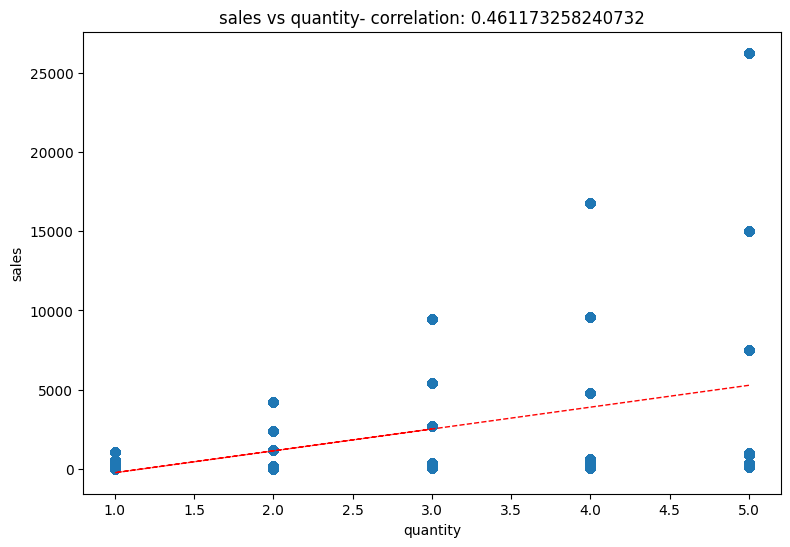

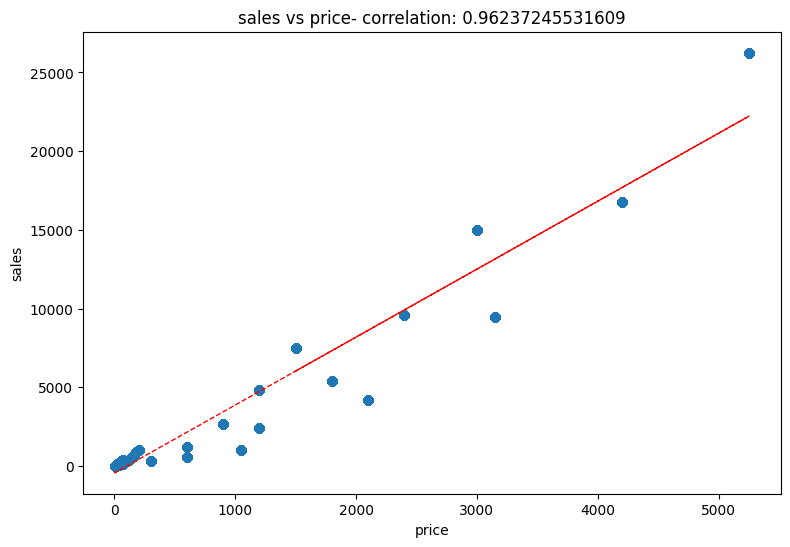

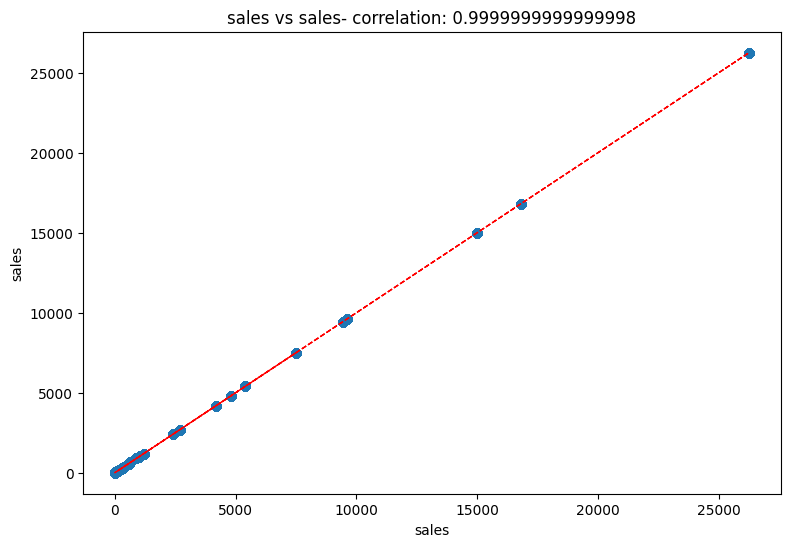

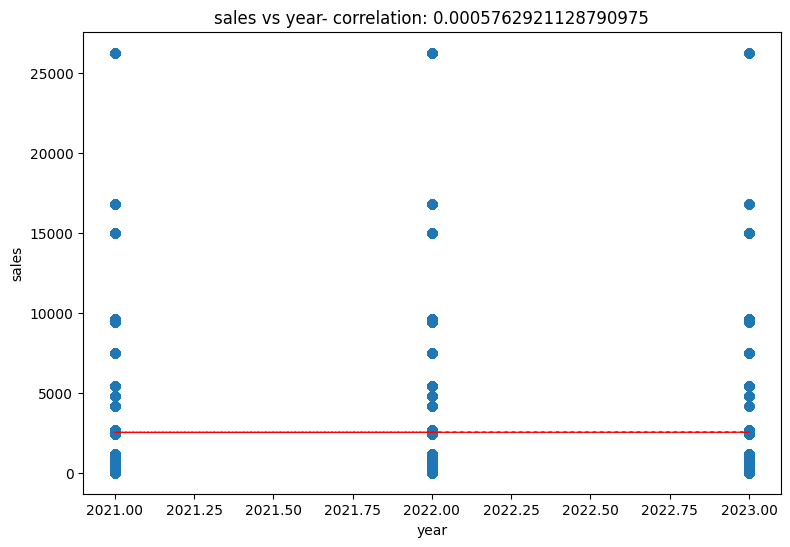

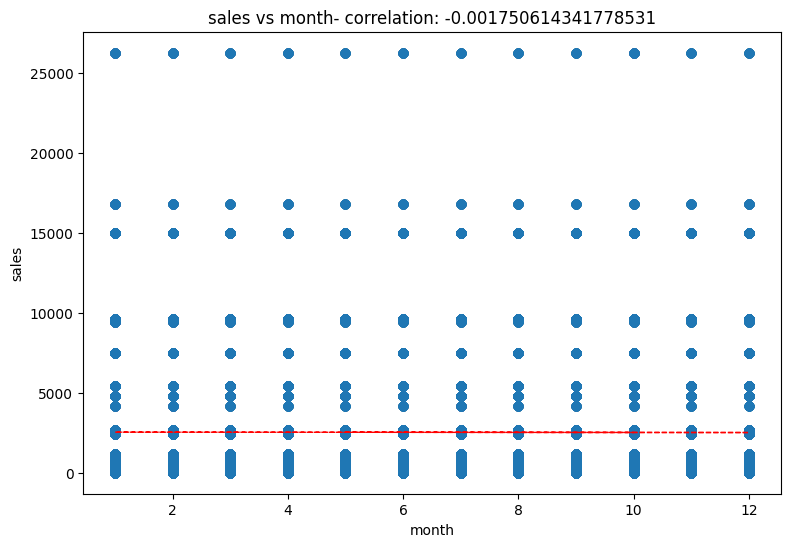

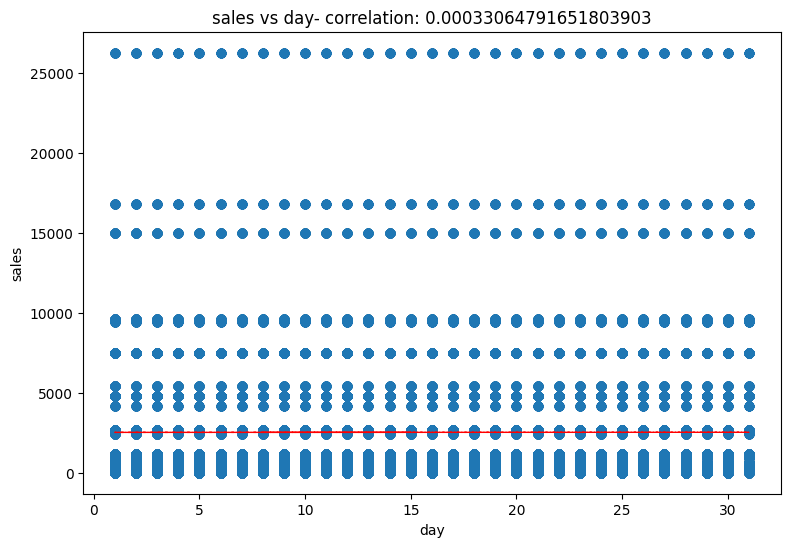

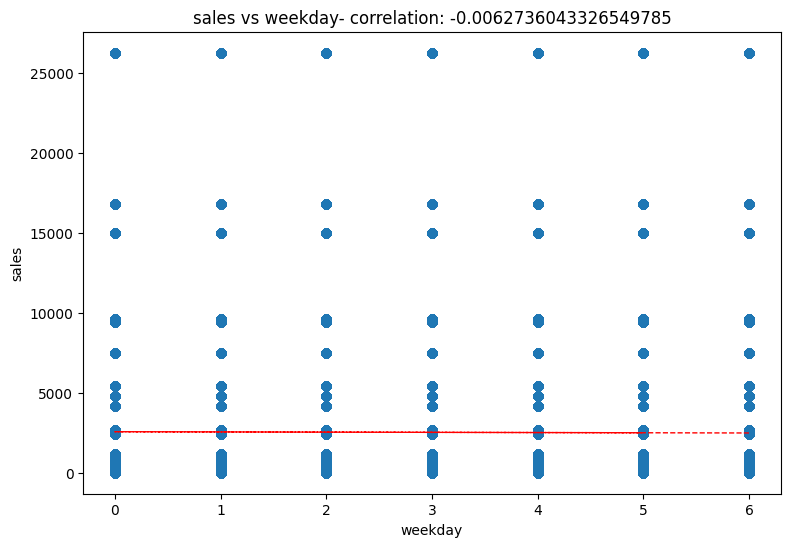

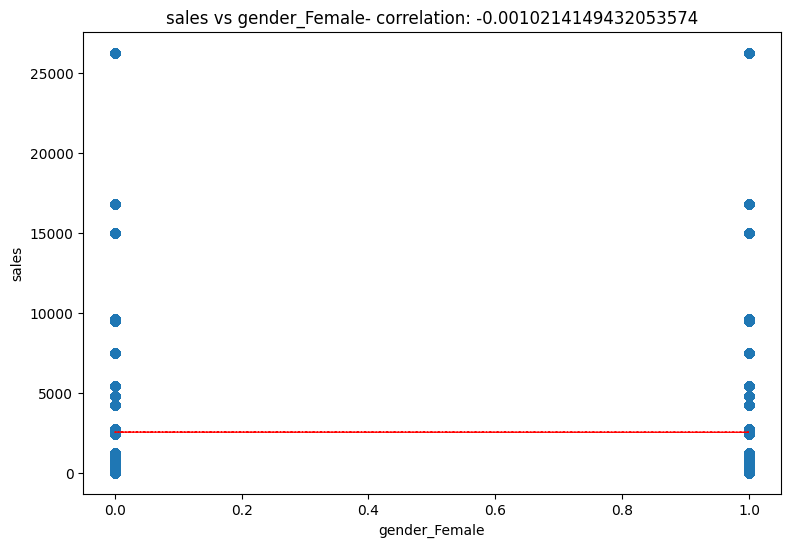

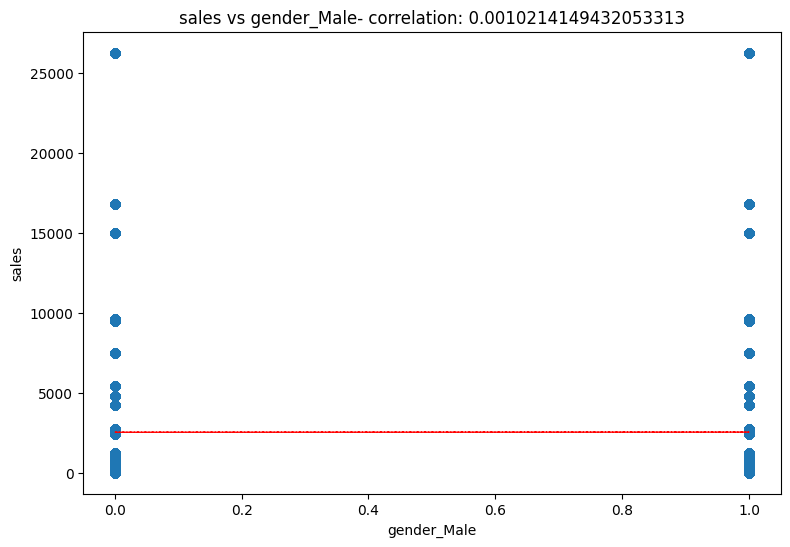

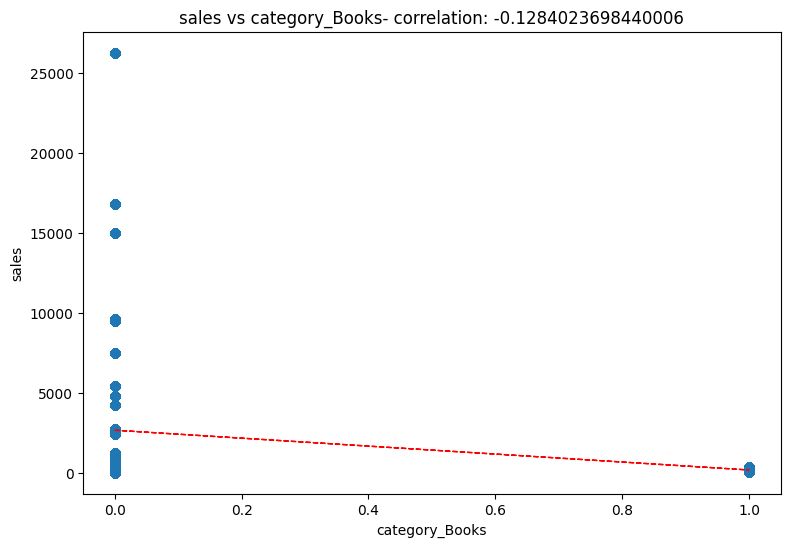

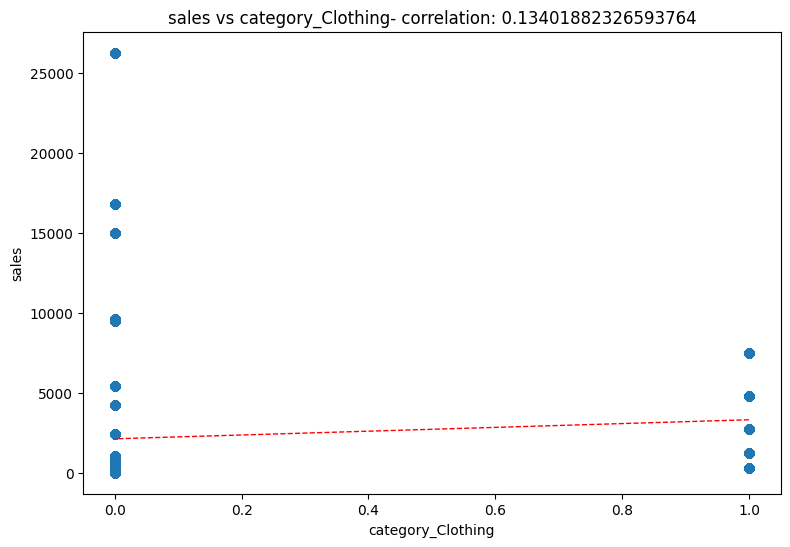

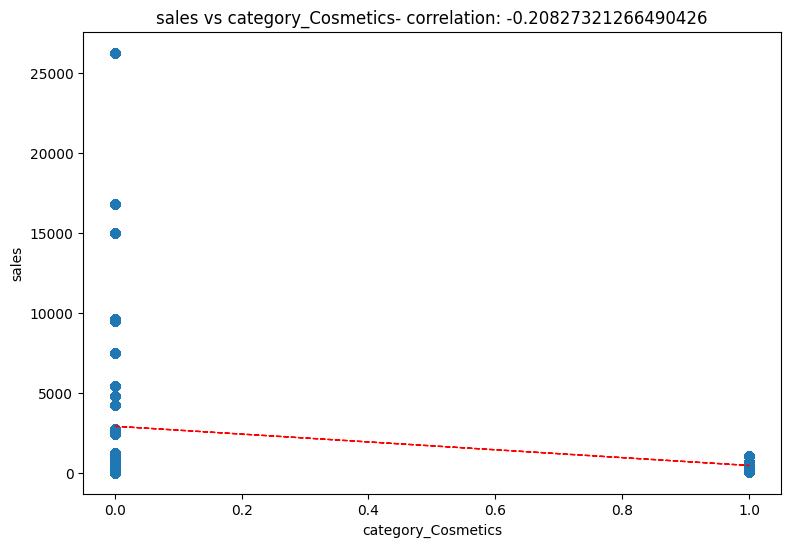

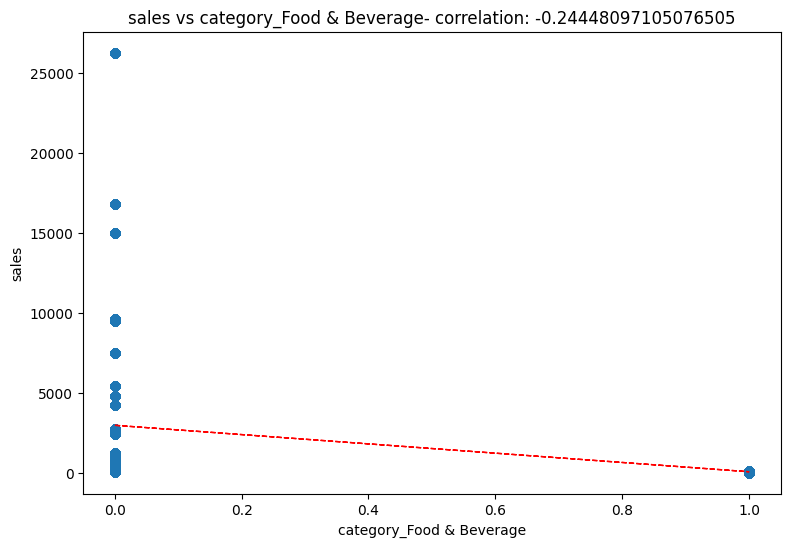

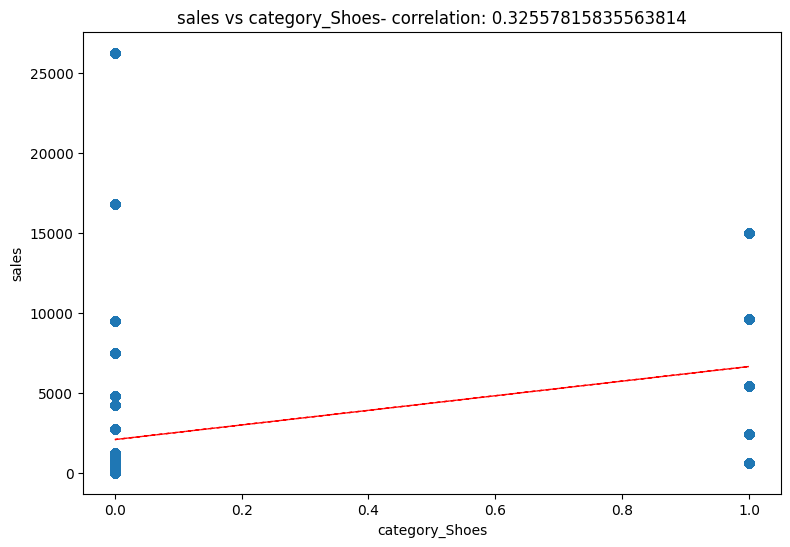

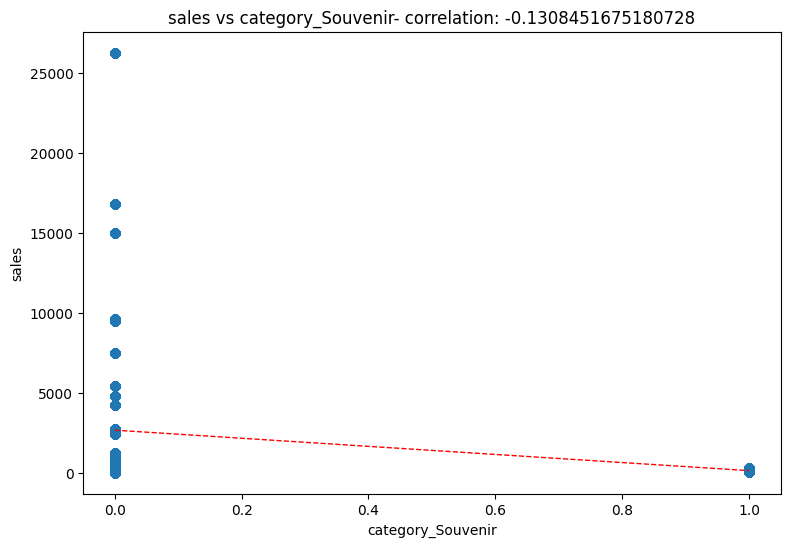

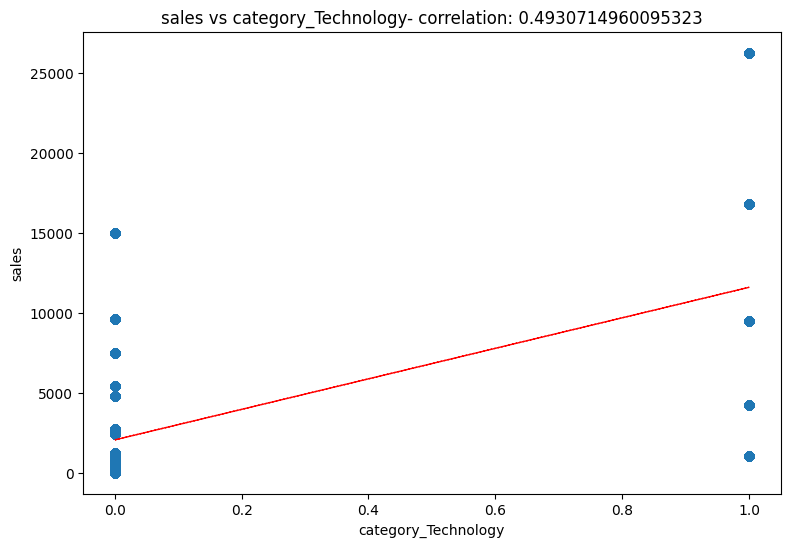

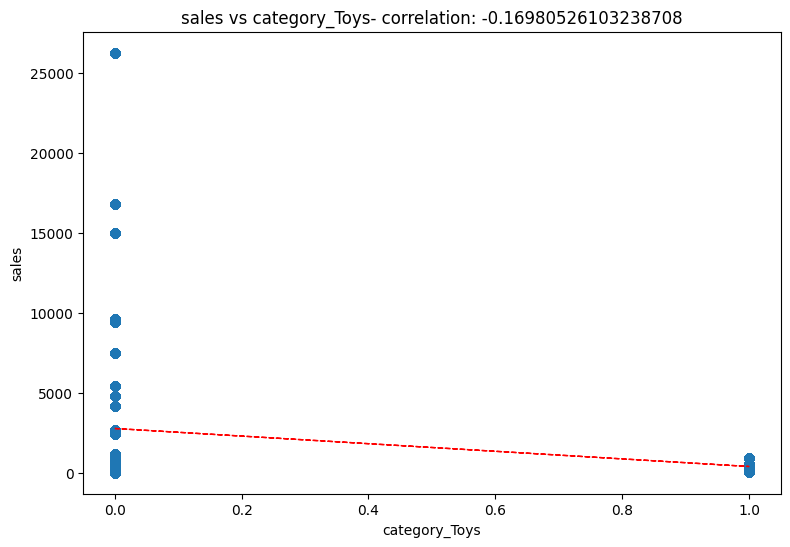

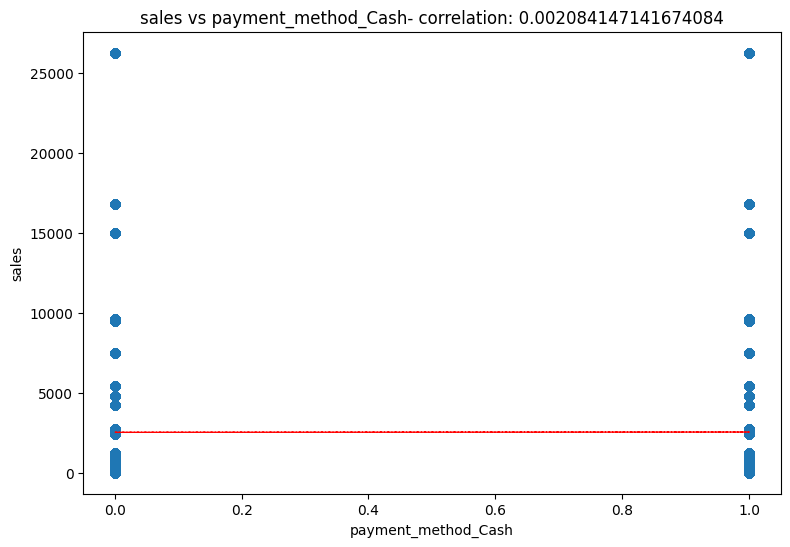

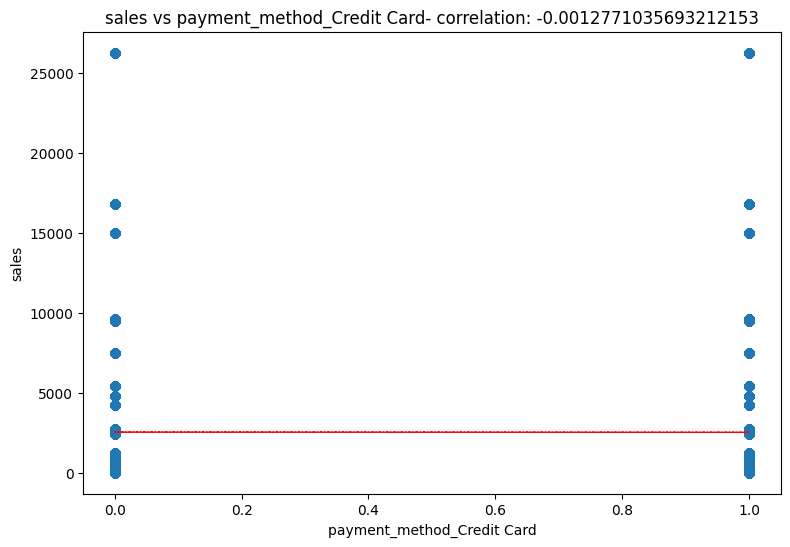

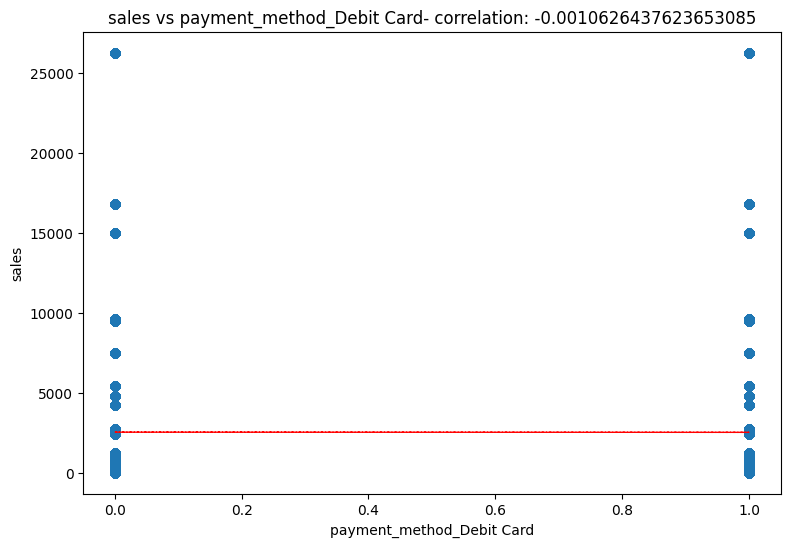

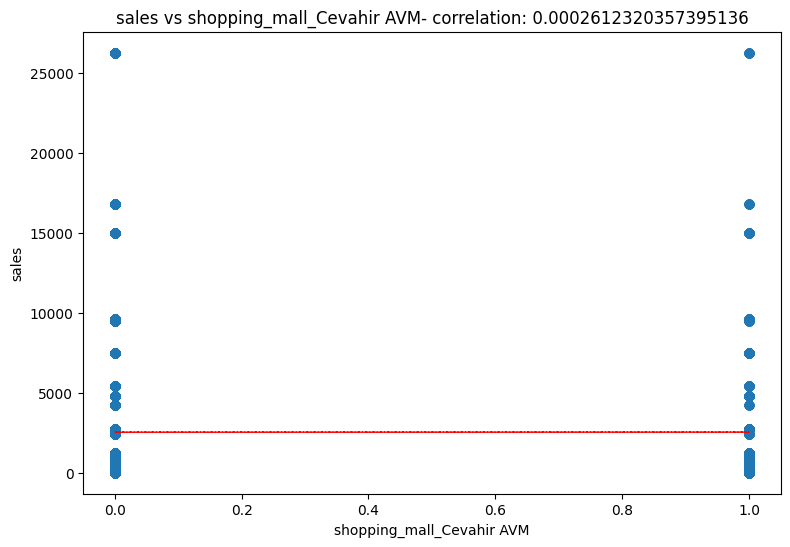

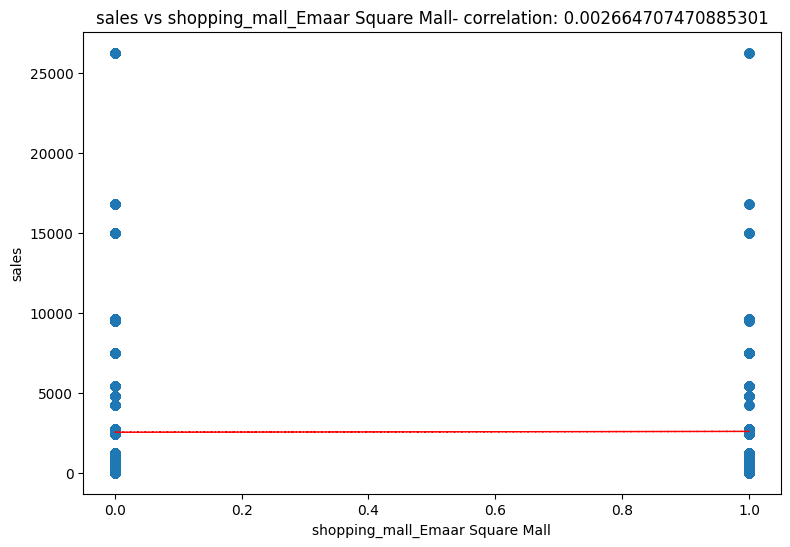

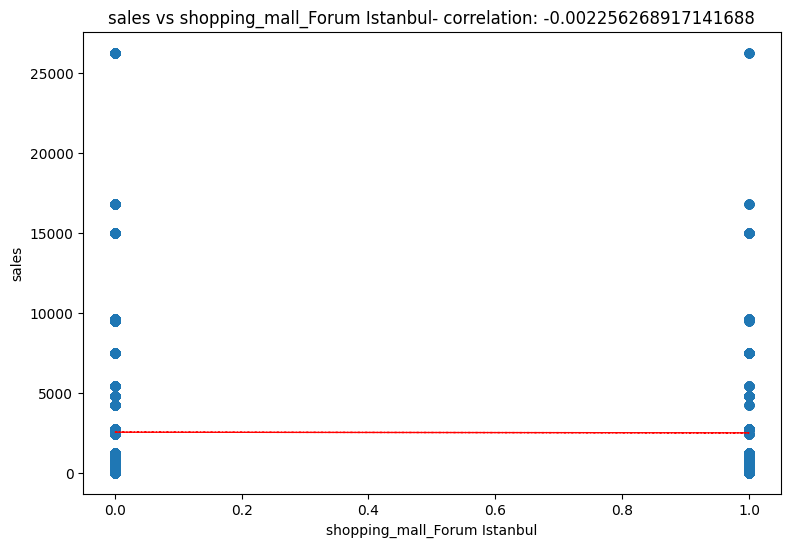

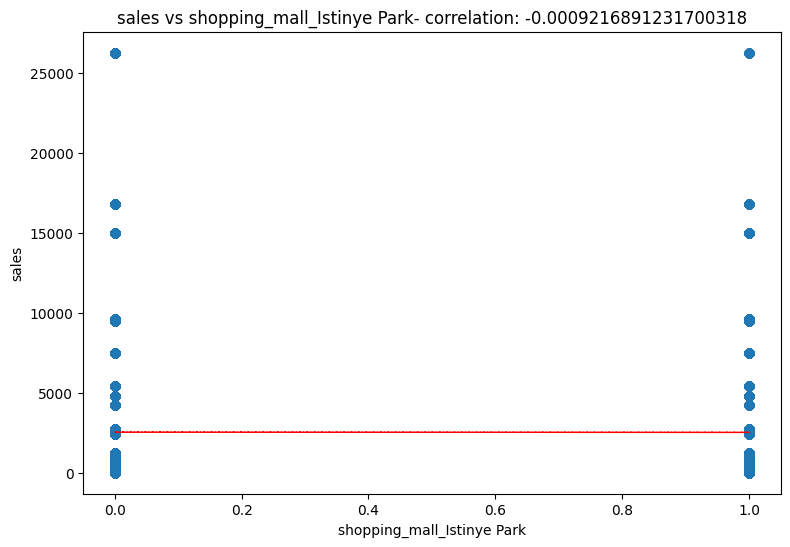

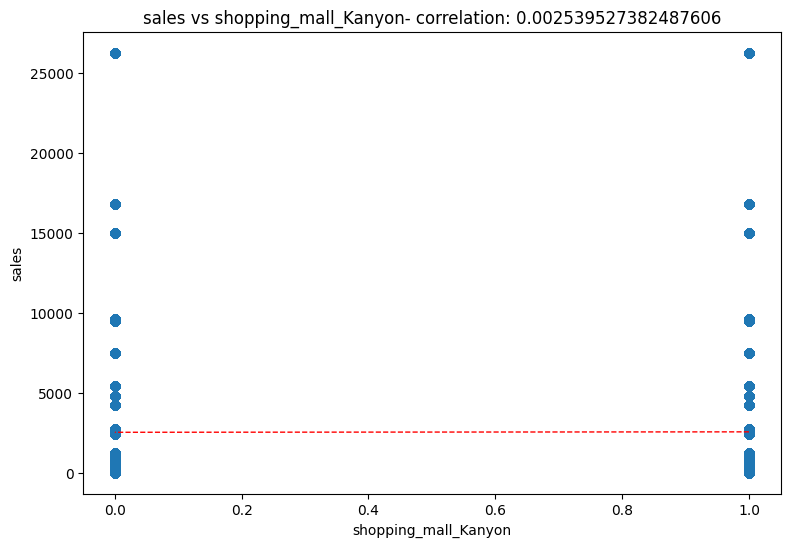

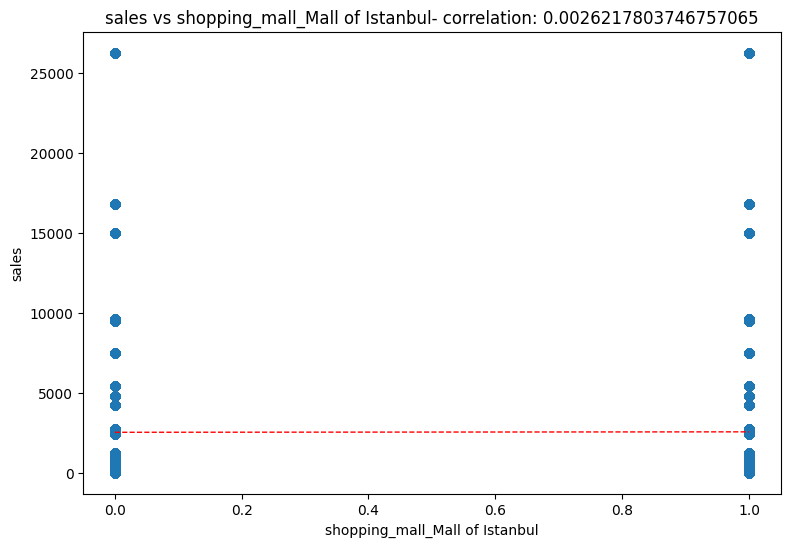

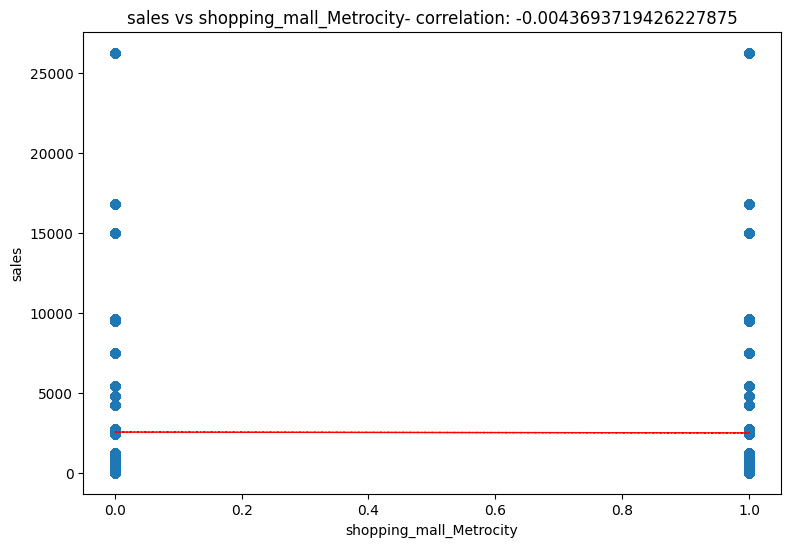

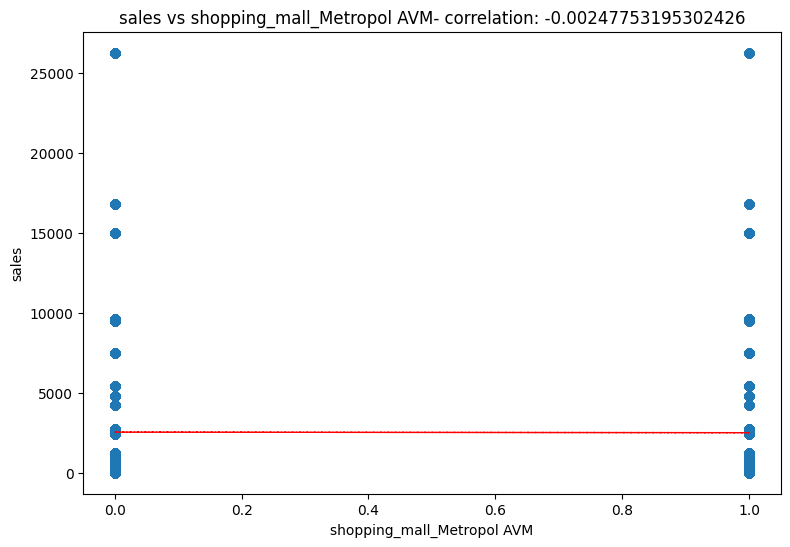

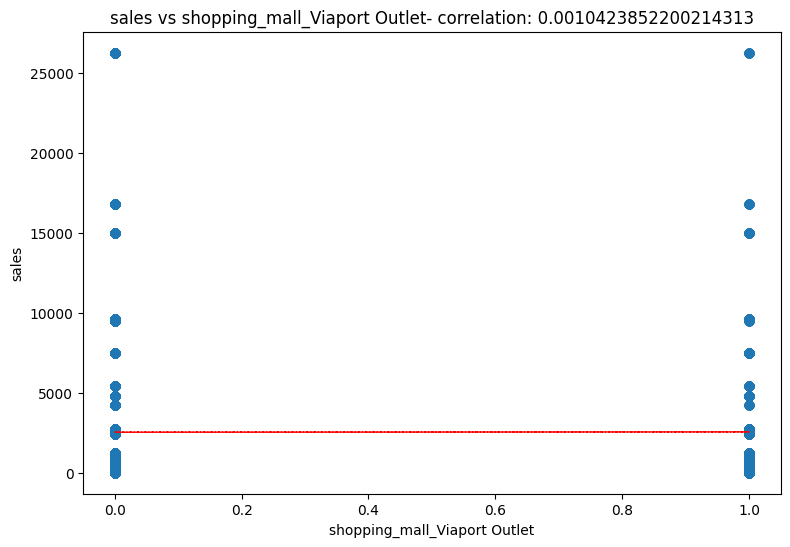

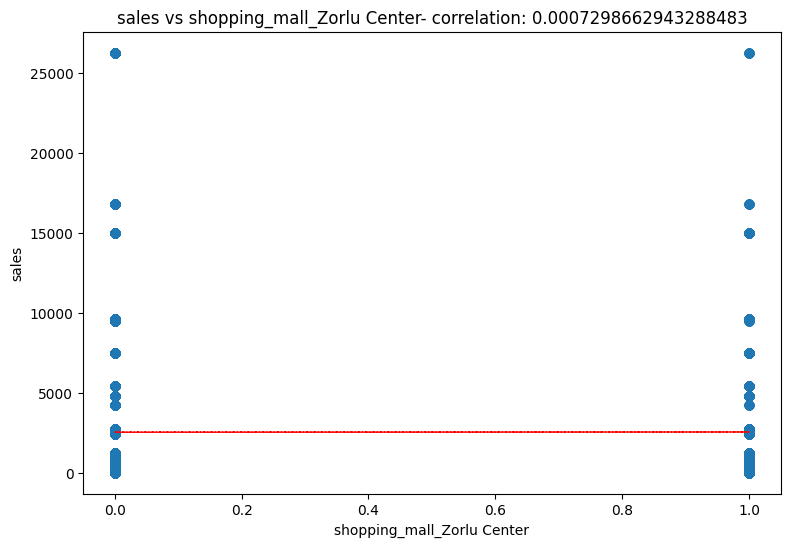

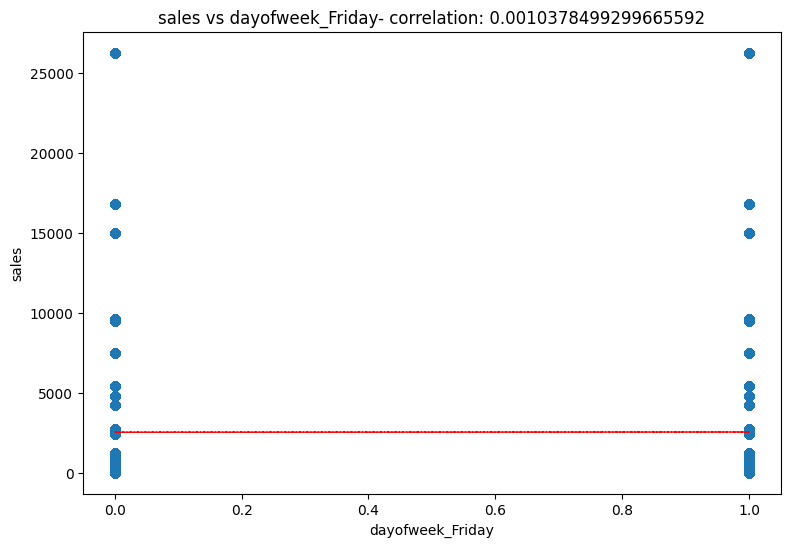

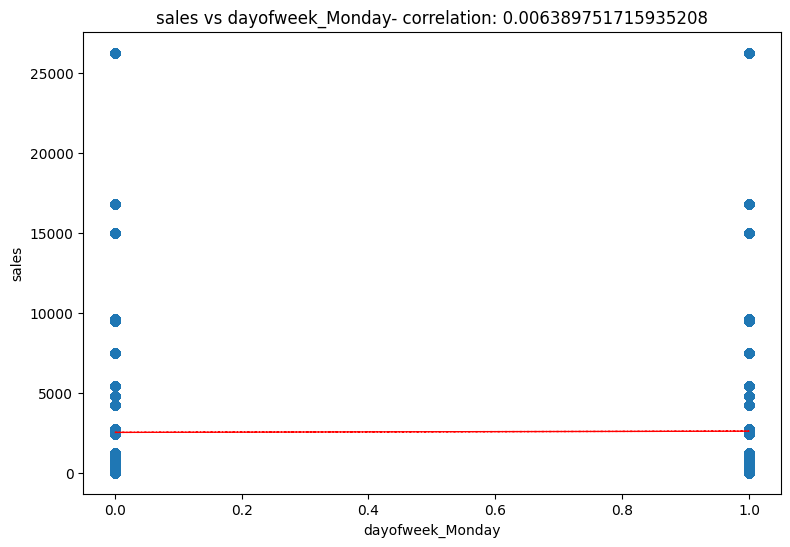

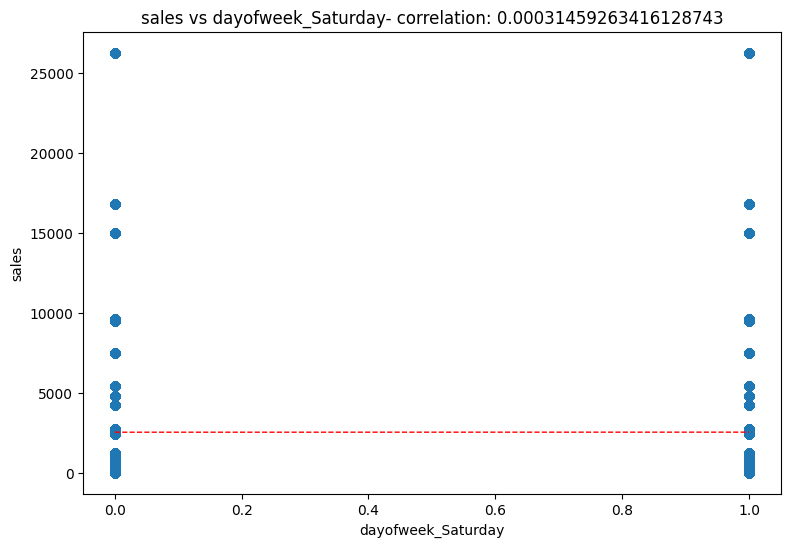

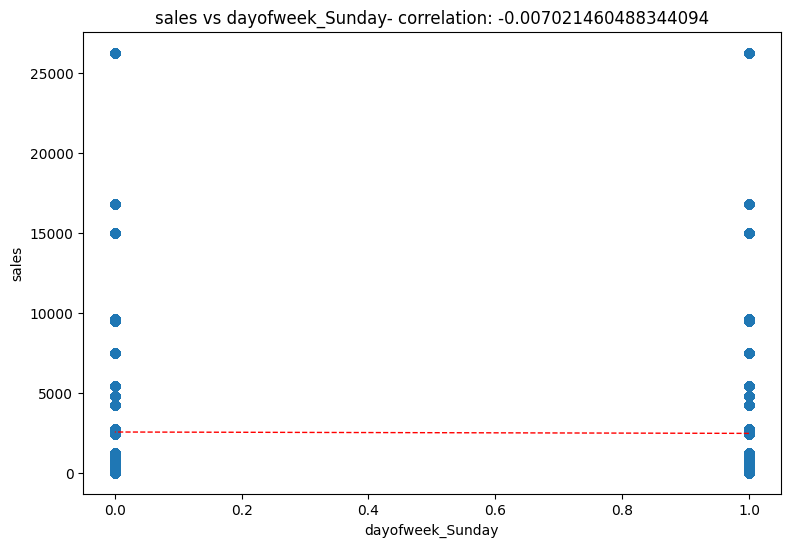

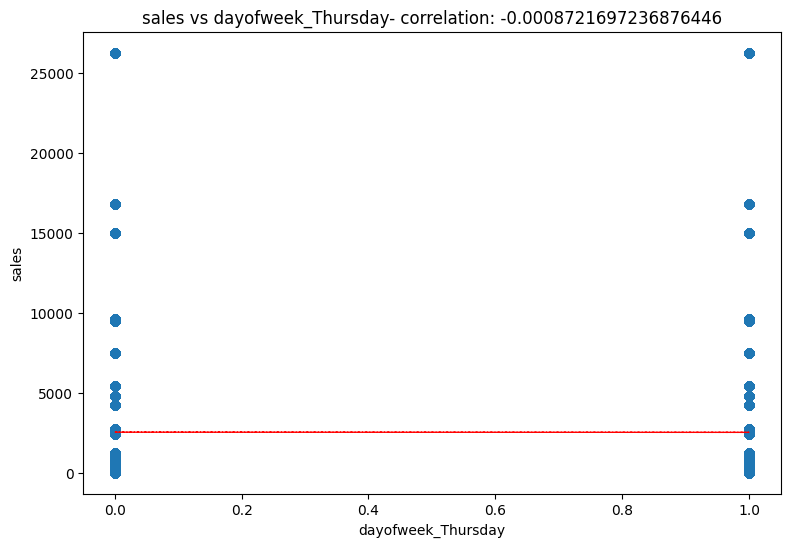

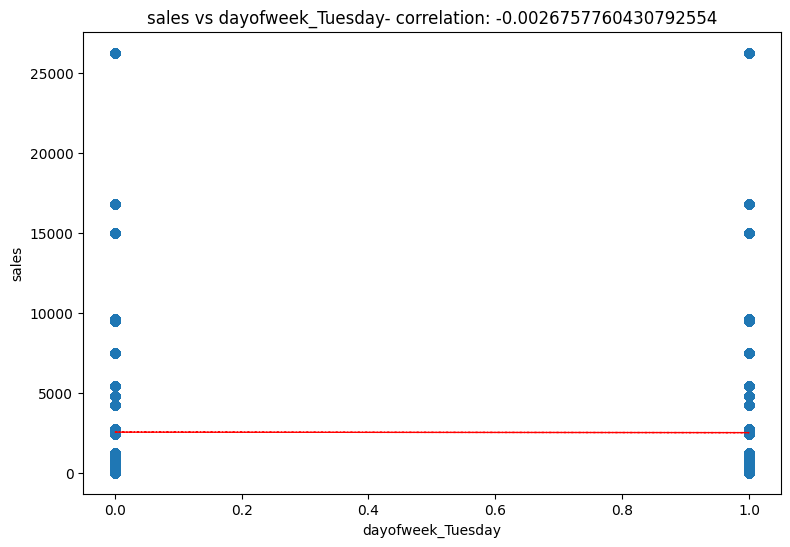

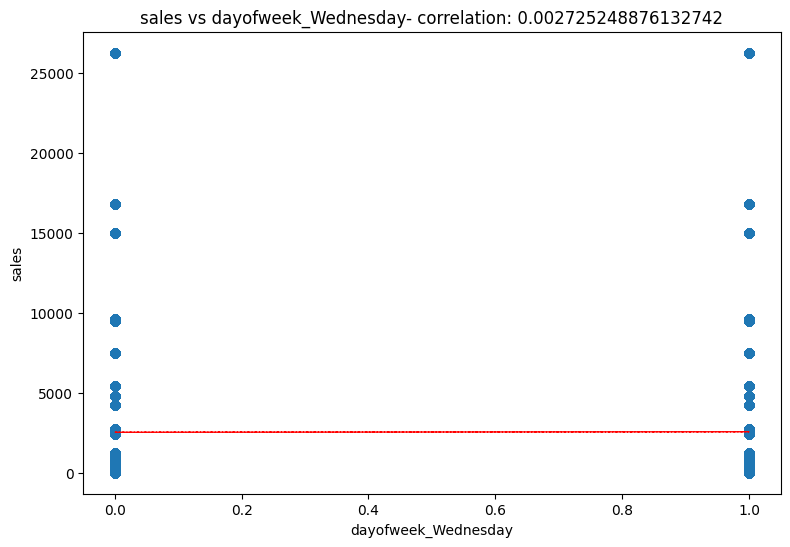

In [ ]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('sales')
    ax.set_title('sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['sales'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

<Axes: >

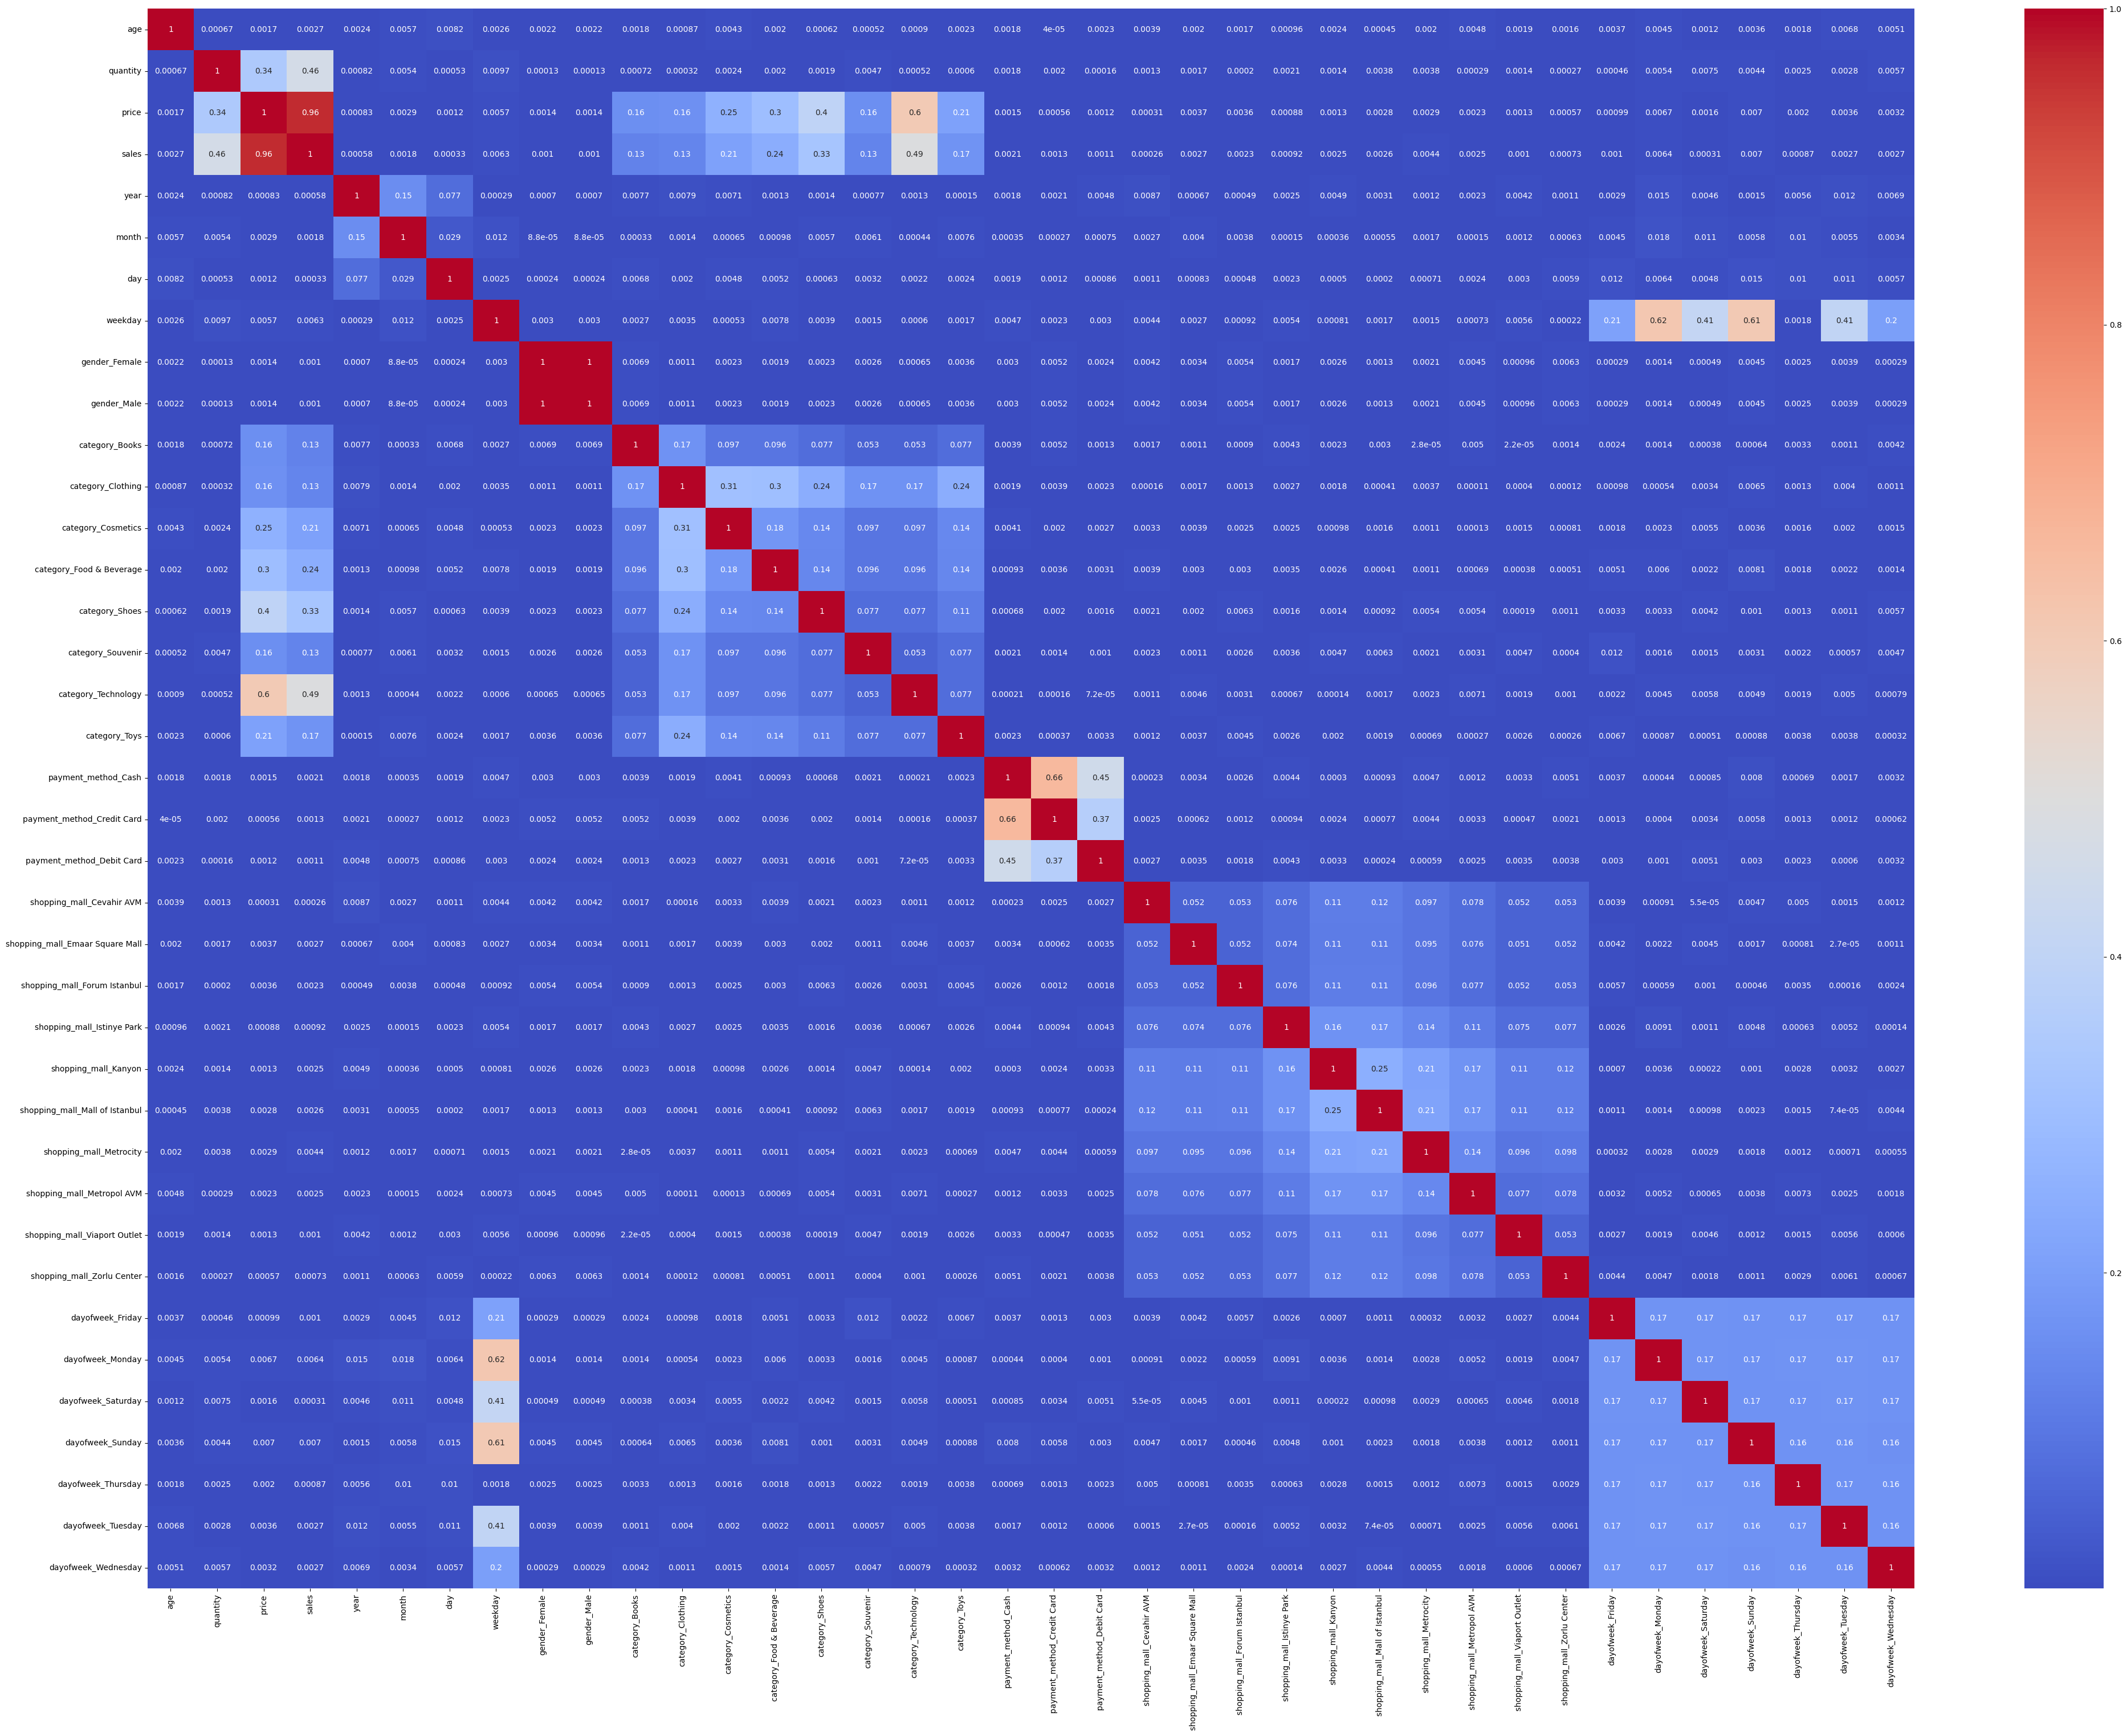

In [ ]:
 ## Correlation
plt.figure(figsize=(50,36))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

dependent_variable = 'Profit'
# Create a list of independent variables
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})
independent_variables
['California_State',
 'Marketing Spend',
 'NewYork_State',
 'R&D Spend',
 'Administration',
 'Florida_State']
# Create the data of independent variables
X = dataset[independent_variables].values

# Create the dependent variable data
y = dataset[dependent_variable].values
dataset[independent_variables]

In [ ]:
dependent_variable = 'sales'

independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

print(independent_variables)


# Create the data of independent variables
X = df[independent_variables].values

# Create the dependent variable data
y = df[dependent_variable].values

['weekday', 'quantity', 'shopping_mall_Viaport Outlet', 'category_Toys', 'dayofweek_Saturday', 'category_Clothing', 'shopping_mall_Forum Istanbul', 'dayofweek_Thursday', 'age', 'payment_method_Credit Card', 'category_Books', 'day', 'month', 'gender_Male', 'dayofweek_Sunday', 'shopping_mall_Metrocity', 'dayofweek_Wednesday', 'dayofweek_Monday', 'category_Food & Beverage', 'category_Technology', 'category_Cosmetics', 'price', 'category_Souvenir', 'year', 'payment_method_Debit Card', 'shopping_mall_Kanyon', 'category_Shoes', 'shopping_mall_Mall of Istanbul', 'dayofweek_Friday', 'dayofweek_Tuesday', 'payment_method_Cash', 'gender_Female', 'shopping_mall_Zorlu Center', 'shopping_mall_Cevahir AVM', 'shopping_mall_Emaar Square Mall', 'shopping_mall_Istinye Park', 'shopping_mall_Metropol AVM']


In [ ]:
df[independent_variables].describe().columns

Index(['weekday', 'quantity', 'shopping_mall_Viaport Outlet', 'category_Toys',
       'dayofweek_Saturday', 'category_Clothing',
       'shopping_mall_Forum Istanbul', 'dayofweek_Thursday', 'age',
       'payment_method_Credit Card', 'category_Books', 'day', 'month',
       'gender_Male', 'dayofweek_Sunday', 'shopping_mall_Metrocity',
       'dayofweek_Wednesday', 'dayofweek_Monday', 'category_Food & Beverage',
       'category_Technology', 'category_Cosmetics', 'price',
       'category_Souvenir', 'year', 'payment_method_Debit Card',
       'shopping_mall_Kanyon', 'category_Shoes',
       'shopping_mall_Mall of Istanbul', 'dayofweek_Friday',
       'dayofweek_Tuesday', 'payment_method_Cash', 'gender_Female',
       'shopping_mall_Zorlu Center', 'shopping_mall_Cevahir AVM',
       'shopping_mall_Emaar Square Mall', 'shopping_mall_Istinye Park',
       'shopping_mall_Metropol AVM'],
      dtype='object')

In [ ]:
df.describe().columns

Index(['age', 'quantity', 'price', 'sales', 'year', 'month', 'day', 'weekday',
       'gender_Female', 'gender_Male', 'category_Books', 'category_Clothing',
       'category_Cosmetics', 'category_Food & Beverage', 'category_Shoes',
       'category_Souvenir', 'category_Technology', 'category_Toys',
       'payment_method_Cash', 'payment_method_Credit Card',
       'payment_method_Debit Card', 'shopping_mall_Cevahir AVM',
       'shopping_mall_Emaar Square Mall', 'shopping_mall_Forum Istanbul',
       'shopping_mall_Istinye Park', 'shopping_mall_Kanyon',
       'shopping_mall_Mall of Istanbul', 'shopping_mall_Metrocity',
       'shopping_mall_Metropol AVM', 'shopping_mall_Viaport Outlet',
       'shopping_mall_Zorlu Center', 'dayofweek_Friday', 'dayofweek_Monday',
       'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday',
       'dayofweek_Tuesday', 'dayofweek_Wednesday'],
      dtype='object')

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df[independent_variables].describe().columns if i not in []]])

variables       VIF
0                           weekday       inf
1                          quantity  1.741664
2      shopping_mall_Viaport Outlet       inf
3                     category_Toys       inf
4                dayofweek_Saturday       inf
5                 category_Clothing       inf
6      shopping_mall_Forum Istanbul       inf
7                dayofweek_Thursday       inf
8                               age  1.000331
9        payment_method_Credit Card       inf
10                   category_Books       inf
11                              day  1.008487
12                            month  1.027062
13                      gender_Male       inf
14                 dayofweek_Sunday       inf
15          shopping_mall_Metrocity       inf
16              dayofweek_Wednesday       inf
17                 dayofweek_Monday       inf
18         category_Food & Beverage       inf
19              category_Technology       inf
20               category_Cosmetics       inf
21                            price  6.283737
22                category_Souvenir       inf
23                             year  1.032263
24        payment_method_Debit Card       inf
25             shopping_mall_Kanyon       inf
26                   category_Shoes       inf
27   shopping_mall_Mall of Istanbul       inf
28                 dayofweek_Friday       inf
29                dayofweek_Tuesday       inf
30              payment_method_Cash       inf
31                    gender_Female       inf
32       shopping_mall_Zorlu Center       inf
33        shopping_mall_Cevahir AVM       inf
34  shopping_mall_Emaar Square Mall       inf
35       shopping_mall_Istinye Park       inf
36       shopping_mall_Metropol AVM       inf

In [ ]:
print('before PCA SHAPE',  {X.shape})

before PCA SHAPE {(99457, 37)}


In [ ]:
from sklearn.decomposition import PCA

pca=PCA(0.75)

X=pca.fit_transform(X)

In [ ]:
print('AFTER PCA SHAPE',  {X.shape})
print("%of importance features",pca.explained_variance_ratio_)
print("No of stlected  features",pca.n_components_)

AFTER PCA SHAPE {(99457, 1)}
%of importance features [0.99963018]
No of stlected  features 1


In [ ]:
X


array([[ 811.14412119],
       [1111.25286093],
       [-389.17795266],
       ...,
       [-678.79617071],
       [3510.74413586],
       [-654.06652468]])

In [ ]:
y

array([ 7502.  ,  5401.53,   300.08, ...,    20.92, 16800.  ,   105.57])

In [ ]:
from sklearn.model_selection import train_test_split
import math

In [ ]:

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 17)

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [ ]:
def print_metrics(actual, predicted):
    print('MSE is {}'.format(mean_squared_error(actual, predicted)))
    print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
    print('MAE is {}'.format(mean_absolute_error(actual, predicted)))

In [ ]:
print(X.shape)
print(y.shape)

(99457, 1)
(99457,)


In [ ]:
y.shape

(99457,)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_

2529.2383639133463

In [ ]:
regressor.coef_

array([4.3158901])

In [ ]:

# Validating Assumptions
y_train_pred_lr = regressor.predict(X_train)
y_test_pred_lr = regressor.predict(X_test)

In [ ]:
print(y_test_pred_lr)

[ 2144.74542659  -290.83680021  -270.03905194 ...  -422.94580216
 17681.22118317  2144.70770263]


In [ ]:
print({"actual y_values" :y_test, "predicted y_values": y_test_pred_lr})

{'actual y_values': array([6.00170e+02, 3.58400e+01, 4.06600e+01, ..., 5.23000e+00,
       1.68000e+04, 1.20032e+03]), 'predicted y_values': array([ 2144.74542659,  -290.83680021,  -270.03905194, ...,
        -422.94580216, 17681.22118317,  2144.70770263])}


In [ ]:
# actual y values
print(y_test)

[6.00170e+02 3.58400e+01 4.06600e+01 ... 5.23000e+00 1.68000e+04
 1.20032e+03]


In [ ]:
# Evaluation of training Data
print_metrics(y_train, y_train_pred_lr)


#Find R-squared value
r2 = r2_score(y_train, y_train_pred_lr)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_train, y_train_pred_lr))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")


MSE is 1317179.1968816498
RMSE is 1147.6842757839152
MAE is 798.5740824787925
r2:0.925988761591993
Adj_r2:0.9259878313701762


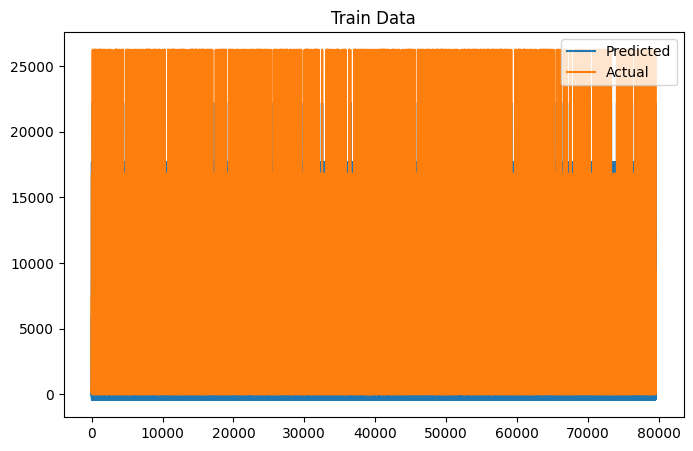

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Train Data')
plt.plot(y_train_pred_lr)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# Test dataset metrics
print_metrics(y_test, y_test_pred_lr)

# evaluating test data
 #Find R-squared value
r2 = r2_score(y_test, y_test_pred_lr)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_test_pred_lr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

MSE is 1313726.5400414797
RMSE is 1146.1791046958933
MAE is 797.8239345000143
r2:0.9268421835796204
Adj_r2:0.9268385054591368


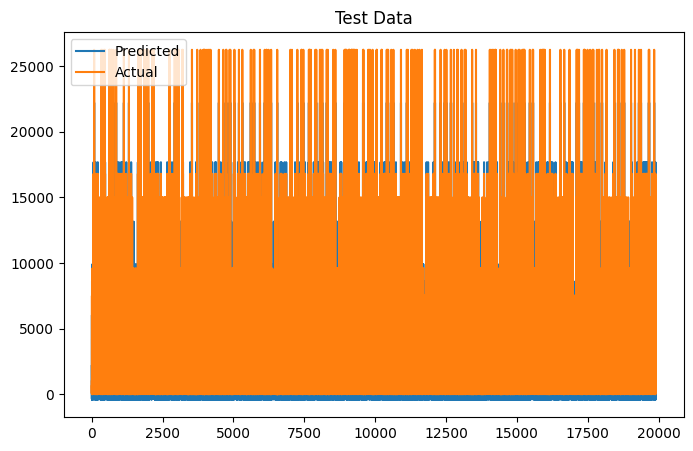

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Test Data')
plt.plot(y_test_pred_lr)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()


# implementing regularization using Lasso and Ridge

Implementing Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
### Grid search cv on lasso

lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
lasso_regressor.score(X_train,y_train)

-1317179.1968816498

In [ ]:
# Validating Assumptions
y_train_pred_lasso = lasso_regressor.predict(X_train)
y_test_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
print(y_test_pred_lasso)

[ 2144.74542659  -290.83680021  -270.03905194 ...  -422.94580216
 17681.22118317  2144.70770263]


In [ ]:
# actual vlues of y
print(y_test)

[6.00170e+02 3.58400e+01 4.06600e+01 ... 5.23000e+00 1.68000e+04
 1.20032e+03]


In [ ]:
# Evaluation of training Data
print_metrics(y_train, y_train_pred_lasso)

# Evaluating train data
#Find R-squared value
r2 = r2_score(y_train, y_train_pred_lasso)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_train, y_train_pred_lasso))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

MSE is 1317179.1968816498
RMSE is 1147.6842757839152
MAE is 798.5740824787929
r2:0.925988761591993
Adj_r2:0.9259878313701762


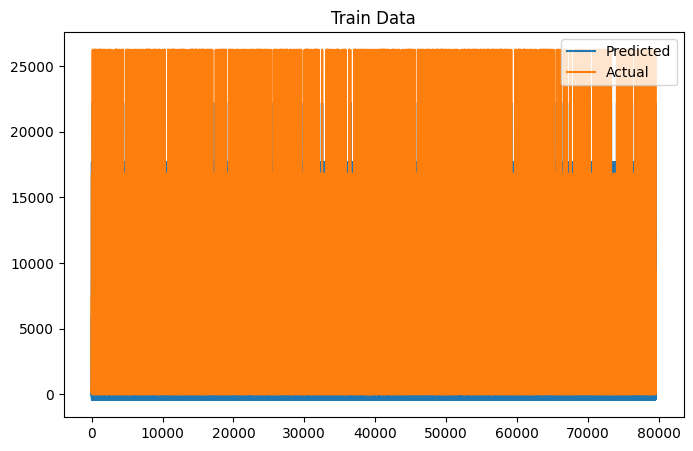

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Train Data')
plt.plot(y_train_pred_lasso)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# Evaluating test data
print_metrics(y_test, y_test_pred_lasso)

#Find R-squared value
r2 = r2_score(y_test, y_test_pred_lasso)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_test_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

MSE is 1313726.5400414797
RMSE is 1146.1791046958933
MAE is 797.8239345000145
r2:0.9268421835796204
Adj_r2:0.9268385054591368


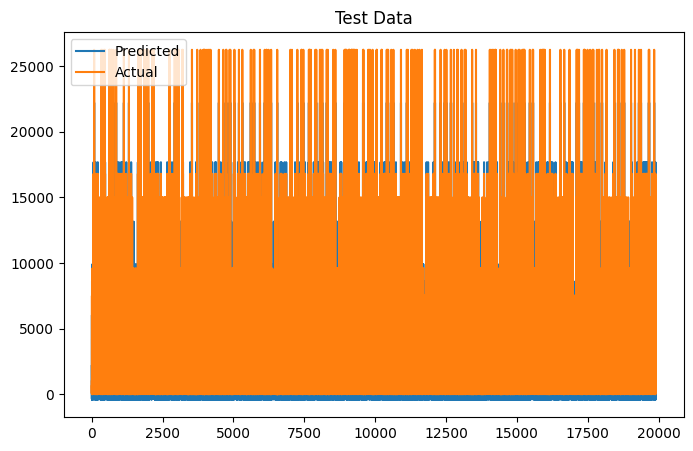

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Test Data')
plt.plot(y_test_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Grid cv on RIDGE
ridge=Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
ridge_regressor.score(X_train,y_train)


-1317179.1968816498

In [ ]:
# Validating Assumptions
y_train_pred_ridge = ridge_regressor.predict(X_train)
y_test_pred_ridge = ridge_regressor.predict(X_test)

print(y_test_pred_ridge)

[ 2144.74542659  -290.83680021  -270.03905194 ...  -422.94580216
 17681.22118317  2144.70770263]


In [ ]:
# actual vlues of y
print(y_test)

[6.00170e+02 3.58400e+01 4.06600e+01 ... 5.23000e+00 1.68000e+04
 1.20032e+03]


In [ ]:
# Evaluation of training Data
print_metrics(y_train, y_train_pred_ridge)

#Find R-squared value
r2 = r2_score(y_train, y_train_pred_ridge)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_train, y_train_pred_ridge))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")


MSE is 1317179.1968816498
RMSE is 1147.6842757839152
MAE is 798.5740824787932
r2:0.925988761591993
Adj_r2:0.9259878313701762


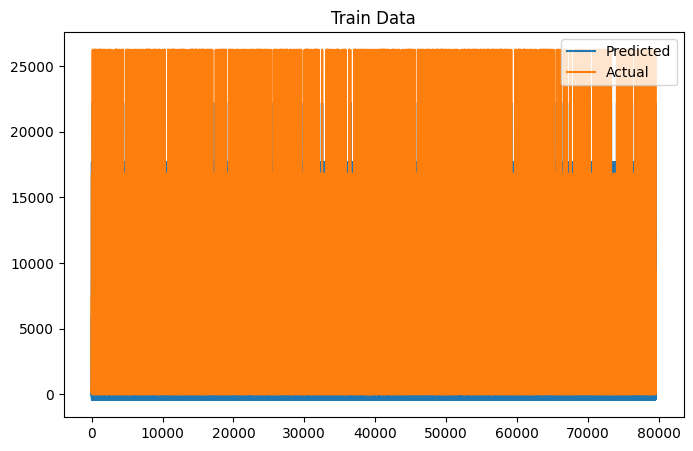

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Train Data')
plt.plot(y_train_pred_ridge)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# Evaluating test data
print_metrics(y_test, y_test_pred_ridge)
#Find R-squared value
r2 = r2_score(y_test, y_test_pred_ridge)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_test_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

MSE is 1313726.5400414797
RMSE is 1146.1791046958933
MAE is 797.8239345000148
r2:0.9268421835796204
Adj_r2:0.9268385054591368


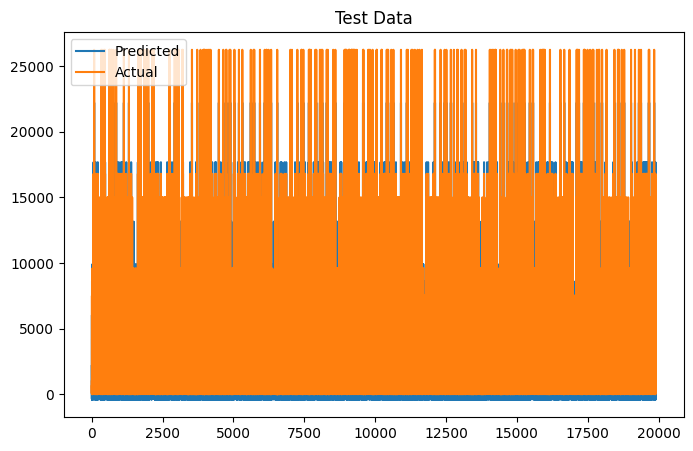

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Test Data')
plt.plot(y_test_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

conclusion :
after implmentation of different regression algorithams  linear performing best score ,it R2 testing score is 98%